# Section 1. Introduction to the problem/task and dataset

The chosen dataset for this machine project is the [Music Dataset](https://dlsu.instructure.com/courses/190312/files/22525897). The original dataset contains a total of 17997 rows and 17 features. The features contain metadata, performance metrics and track details.

# Section 2. Description of the dataset

The dataset only includes one csv file. Each of the ~18k rows in the dataset represents a musical track. Their 17 columns represent the dataset features. These features include (feature descriptions sourced from the included PDF file):

## Features

- **Artist Name** - Name of artist
  
- **Track Name** - Name of song 
- **Popularity** - a value between 0 and 100, with 100 being the most popular. The popularity is calculated by an algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. 
- **danceability** - describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
- **energy** - a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 
- **key** - The key the track is in. Integers map to pitches using standard Pitch Class notation. If no key was detected, the value is -1. 
- **loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db. 
- **mode** - indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. 
- **speechiness** - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 
- **acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 
- **instrumentalness** - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. STINTSY T1AY2425 
- **liveness** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 
- **valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry). 
- **tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
- **duration_in min/ms** - Duration in ms. 
- **time_signature** - An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of “3/4”, to “7/4”. 
- **Class** - corresponds to the genre of the track.



# Importing the following libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import itertools

# Reading and collecting a brief overview of the dataset

In [2]:
df = pd.DataFrame()
df = pd.read_csv("Dataset 6 - Music Dataset/Dataset 6 - Music Dataset/music.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [3]:
df.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0               NaN    0.0849   0.8990  134.071            234596.0   
1          0.004010    0.1010   0.5690  116.454            251733.0   
2          0.000196    0.3940   0.7870  147.681            109667.0   
3               NaN    0.1220   0.5690  107.033            173968.0   
4          0.016100    0.1720   0.0918  199.060            229960.0   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6  
3               4      5  
4               4     10

In [4]:
df.describe()

Popularity  danceability        energy           key      loudness  \
count  17568.000000  17996.000000  17996.000000  15982.000000  17996.000000   
mean      44.512124      0.543433      0.662777      5.952447     -7.910660   
std       17.426928      0.166268      0.235373      3.196854      4.049151   
min        1.000000      0.059600      0.000020      1.000000    -39.952000   
25%       33.000000      0.432000      0.509000      3.000000     -9.538000   
50%       44.000000      0.545000      0.700000      6.000000     -7.016000   
75%       56.000000      0.659000      0.860000      9.000000     -5.189000   
max      100.000000      0.989000      1.000000     11.000000      1.355000   

               mode   speechiness  acousticness  instrumentalness  \
count  17996.000000  17996.000000  17996.000000      13619.000000   
mean       0.636753      0.079707      0.247082          0.177562   
std        0.480949      0.083576      0.310632          0.304048   
min        0.000000      0.022500      0.000000          0.000001   
25%        0.000000      0.034800      0.004300          0.000089   
50%        1.000000      0.047400      0.081400          0.003910   
75%        1.000000      0.083000      0.434000          0.200000   
max        1.000000      0.955000      0.996000          0.996000   

           liveness       valence         tempo  duration_in min/ms  \
count  17996.000000  17996.000000  17996.000000        1.799600e+04   
mean       0.196170      0.486208    122.623294        2.007445e+05   
std        0.159212      0.240195     29.571527        1.119891e+05   
min        0.011900      0.018300     30.557000        5.016500e-01   
25%        0.097500      0.297000     99.620750        1.663370e+05   
50%        0.129000      0.481000    120.065500        2.091600e+05   
75%        0.258000      0.672000    141.969250        2.524900e+05   
max        1.000000      0.986000    217.416000        1.477187e+06   

       time_signature         Class  
count    17996.000000  17996.000000  
mean         3.924039      6.695821  
std          0.361618      3.206073  
min          1.000000      0.000000  
25%          4.000000      5.000000  
50%          4.000000      8.000000  
75%          4.000000     10.000000  
max          5.000000     10.000000

In [5]:
datatypes = df.dtypes
datatypes

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object

# Cleaning the dataset

In [6]:
df.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [7]:
old_length = len(df)

# Drop duplicates
df = df.drop_duplicates(keep = 'first', inplace = False) 

# Drop rows with null popularity
df = df.dropna(subset=["Popularity"])

# Drop columns with high null values
df = df.drop(columns=["instrumentalness"])
df = df.drop(columns=["key"])

new_length = len(df)

(str(old_length - new_length) + " rows were dropped")

'428 rows were dropped'

### Look through dataset for multiple representations and to understand the values better

In [8]:
import os

os.makedirs('dumps', exist_ok=True)

# Open the text file in write mode with utf-8 encoding
with open('dumps/unique_values.txt', 'w', encoding='utf-8') as file:
    for column in df.columns:
        print(column + " column is being written")
        values = sorted(df[column].unique())
        file.write("Column: " + column + "\n")
        file.write("Unique Values = " + ", ".join(map(str, values)) + "\n")
        file.write(str(len(values)) + " unique values\n\n")
        print(column + " has been written")
print("Data exported to 'dumps/unique_values.txt'")


Artist Name column is being written
Artist Name has been written
Track Name column is being written
Track Name has been written
Popularity column is being written
Popularity has been written
danceability column is being written
danceability has been written
energy column is being written
energy has been written
loudness column is being written
loudness has been written
mode column is being written
mode has been written
speechiness column is being written
speechiness has been written
acousticness column is being written
acousticness has been written
liveness column is being written
liveness has been written
valence column is being written
valence has been written
tempo column is being written
tempo has been written
duration_in min/ms column is being written
duration_in min/ms has been written
time_signature column is being written
time_signature has been written
Class column is being written
Class has been written
Data exported to 'dumps/unique_values.txt'


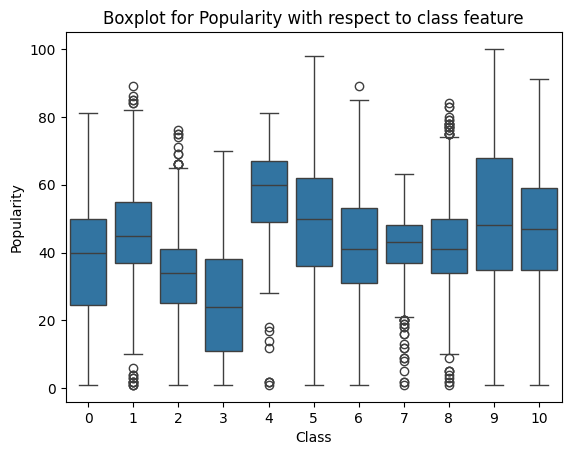

<Figure size 400x600 with 0 Axes>

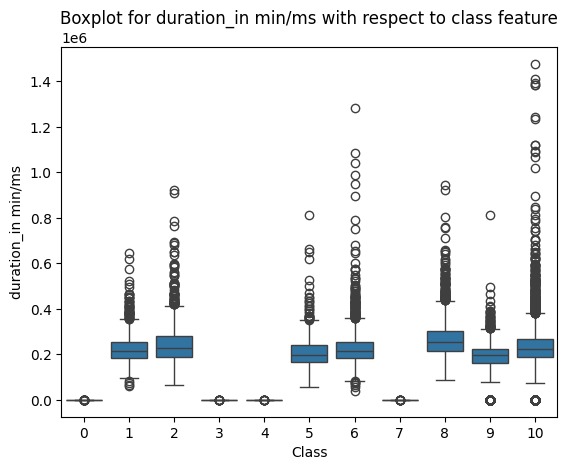

<Figure size 400x600 with 0 Axes>

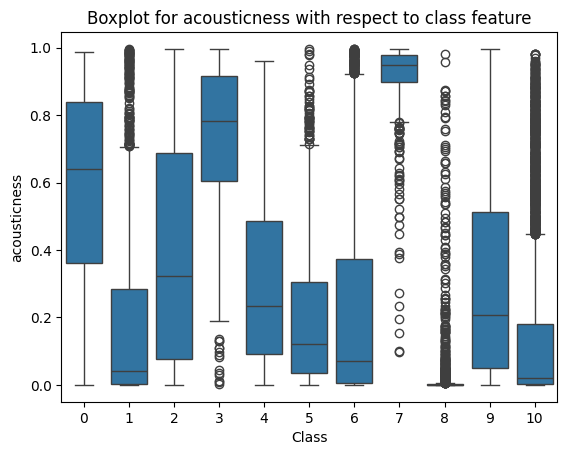

<Figure size 400x600 with 0 Axes>

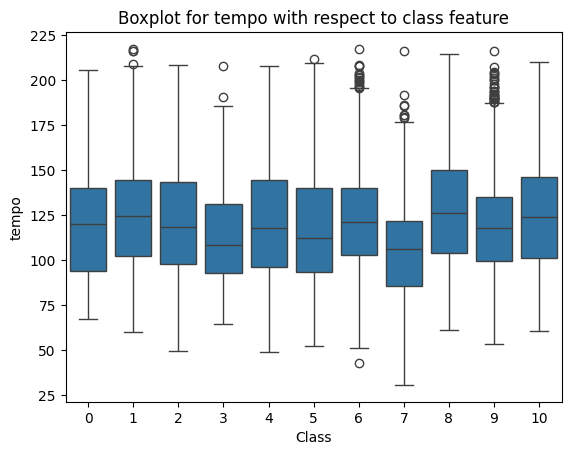

<Figure size 400x600 with 0 Axes>

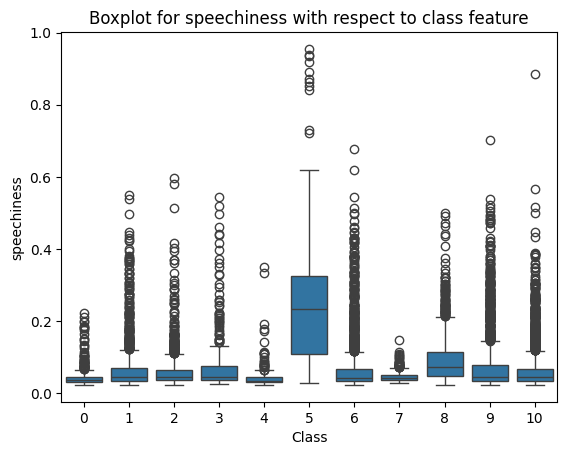

<Figure size 400x600 with 0 Axes>

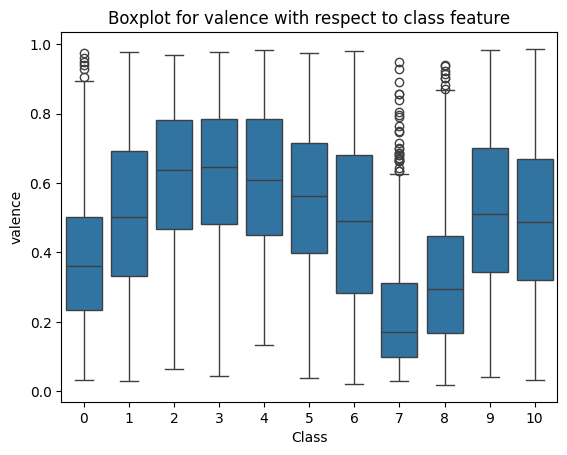

<Figure size 400x600 with 0 Axes>

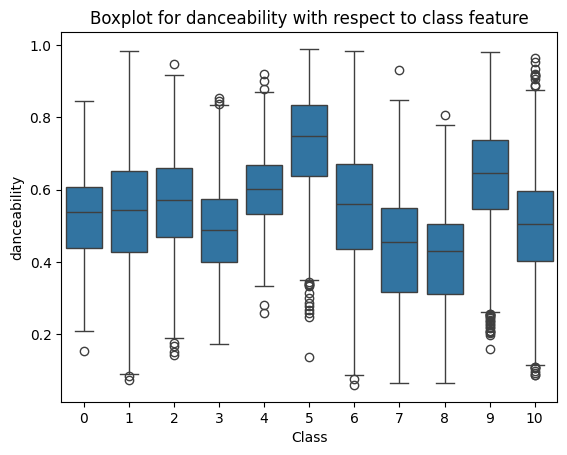

<Figure size 400x600 with 0 Axes>

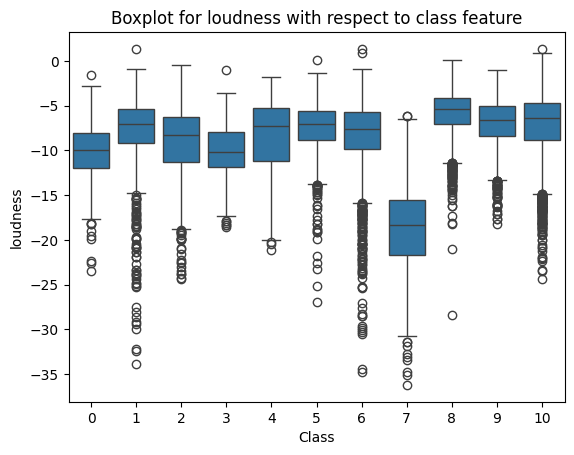

<Figure size 400x600 with 0 Axes>

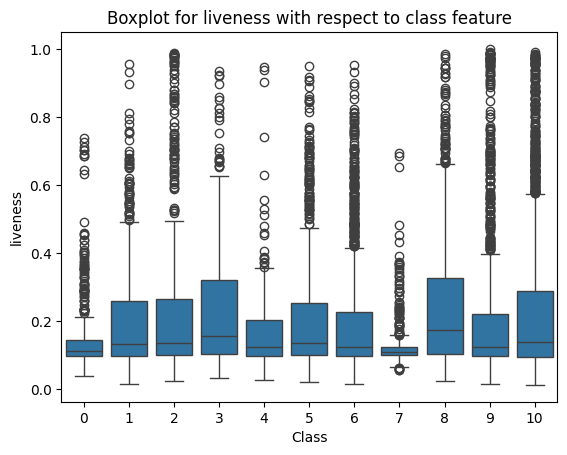

<Figure size 400x600 with 0 Axes>

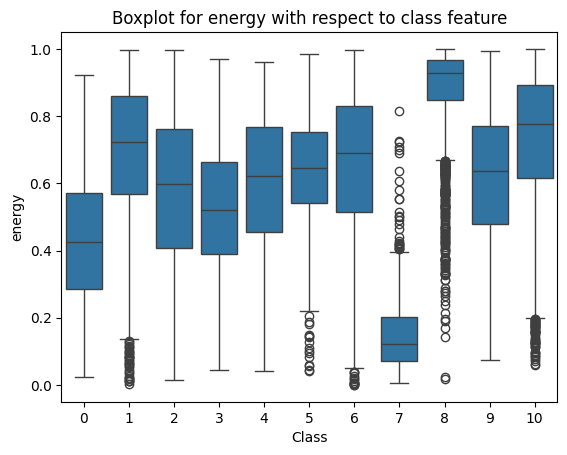

<Figure size 400x600 with 0 Axes>

In [9]:
columns_notype = set(df.columns) - set(['Artist Name', 'Track Name', 'Class', 'mode','time_signature'])
columns_notype = list(columns_notype)

for col in columns_notype:
    sns.boxplot(df, x = 'Class', y = col)
    plt.title("Boxplot for " + col + " with respect to class feature")
    plt.figure(figsize=(4, 6))
    plt.show()

In [10]:
outlier_info = {}

for cls in range(10):
    outlier_info[cls] = {}
    
    
    class_data = df[df['Class'] == cls]
    
    
    for column in columns_notype:
        if column == 'Class':
            continue  # Skip the class column

        
        Q1 = class_data[column].quantile(0.25)
        Q3 = class_data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = class_data[(class_data[column] < lower_bound) | (class_data[column] > upper_bound)]
        
        
        outlier_info[cls][column] = {
            'count': len(outliers),
            'values': outliers[column].tolist()
        }

print("outlier_info is saved")

outlier_info is saved


In [11]:
os.makedirs('dumps', exist_ok=True)


with open('dumps/outliers_info.txt', 'w') as file:
    for cls, features in outlier_info.items():
        file.write(f"Class: {cls}\n")
        for feature, info in features.items():
            file.write(f"  Feature: {feature}\n")
            file.write(f"    Outliers Count: {info['count']}\n")
            file.write(f"    Outlier Values: {info['values']}\n\n")

print("Outlier information exported to 'dumps/outliers_info.txt'")

Outlier information exported to 'dumps/outliers_info.txt'


# Data Precrocessing


#### Variable delcaration

In [12]:
X = df.drop("Class", axis=1)
y = df["Class"]

numeric_features = [
      "Popularity", "danceability", "energy", "loudness", "speechiness", 
      "acousticness", "liveness", "valence", "tempo", "duration_in min/ms", "time_signature"
]
# I didnt include key and mode features here

#### MinMax Scaling

In [13]:
scaler = MinMaxScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

normalized_df = pd.concat([X,y], axis=1)

normalized_df['energy_log'] = np.log1p(normalized_df['energy'])

In [14]:
normalized_df.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)    0.595960   
1                 Boston                           Hitch a Ride    0.535354   
2          The Raincoats                     No Side to Fall In    0.343434   
3                   Deno             Lingo (feat. J.I & Chunkz)    0.656566   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered    0.525253   

   danceability    energy  loudness  mode  speechiness  acousticness  \
0      0.854698  0.563991  0.831803     1     0.027882      0.017169   
1      0.346680  0.813996  0.771487     1     0.019410      0.001104   
2      0.402648  0.613992  0.742101     1     0.032172      0.487952   
3      0.853622  0.596992  0.790173     0     0.035389      0.021285   
4      0.115273  0.974999  0.850036     1     0.207507      0.000170   

   liveness   valence     tempo  duration_in min/ms  time_signature  Class  \
0  0.073879  0.910096  0.553969            0.158812            0.75      5   
1  0.090173  0.569081  0.459689            0.170413            0.75     10   
2  0.386702  0.794358  0.626804            0.074240            0.75      6   
3  0.111426  0.569081  0.409271            0.117769            0.75      5   
4  0.162028  0.075953  0.901766            0.155674            0.75     10   

   energy_log  
0    0.447241  
1    0.595532  
2    0.478711  
3    0.468122  
4    0.680568

# Exploratory Data Analysis

In [15]:
new_df = normalized_df.drop(['Artist Name', 'Track Name', 'Class', 'mode','time_signature'], axis=1)


In [16]:
new_df.isnull().sum()

Popularity            0
danceability          0
energy                0
loudness              0
speechiness           0
acousticness          0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
energy_log            0
dtype: int64

In [17]:
correlation_matrix = new_df[new_df.columns[1:]].corr()
formatted_matrix = correlation_matrix.applymap(lambda x: f"{x:.3f}")
formatted_matrix

C:\Users\user\AppData\Local\Temp\ipykernel_4728\1034098088.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_matrix = correlation_matrix.applymap(lambda x: f"{x:.3f}")


danceability  energy loudness speechiness acousticness  \
danceability              1.000  -0.102    0.052       0.201        0.014   
energy                   -0.102   1.000    0.767       0.124       -0.744   
loudness                  0.052   0.767    1.000       0.095       -0.610   
speechiness               0.201   0.124    0.095       1.000       -0.086   
acousticness              0.014  -0.744   -0.610      -0.086        1.000   
liveness                 -0.110   0.194    0.110       0.068       -0.110   
valence                   0.443   0.221    0.178       0.053       -0.122   
tempo                    -0.187   0.209    0.162       0.047       -0.167   
duration_in min/ms       -0.128   0.236    0.163      -0.000       -0.315   
energy_log               -0.071   0.996    0.785       0.123       -0.755   

                   liveness valence   tempo duration_in min/ms energy_log  
danceability         -0.110   0.443  -0.187             -0.128     -0.071  
energy                0.194   0.221   0.209              0.236      0.996  
loudness              0.110   0.178   0.162              0.163      0.785  
speechiness           0.068   0.053   0.047             -0.000      0.123  
acousticness         -0.110  -0.122  -0.167             -0.315     -0.755  
liveness              1.000   0.020   0.032              0.050      0.191  
valence               0.020   1.000   0.049             -0.102      0.242  
tempo                 0.032   0.049   1.000              0.043      0.208  
duration_in min/ms    0.050  -0.102   0.043              1.000      0.244  
energy_log            0.191   0.242   0.208              0.244      1.000

# Look at the correlation of values

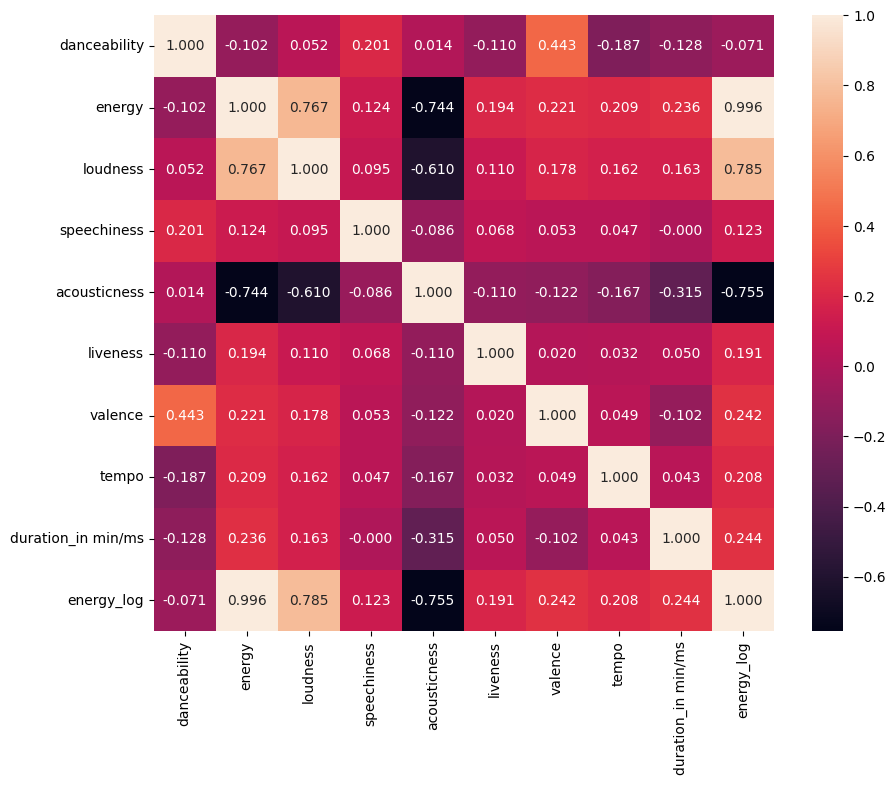

In [18]:
plt.figure(figsize =(10,8))
plot = sns.heatmap(correlation_matrix, annot = True, fmt=".3f")

# Look at the distribution of data

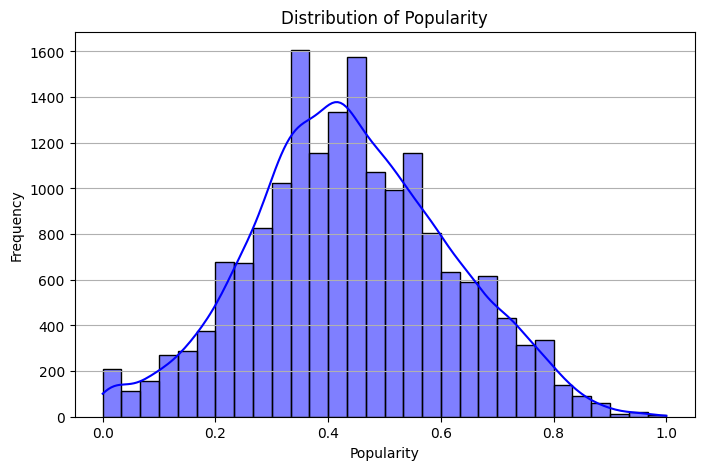

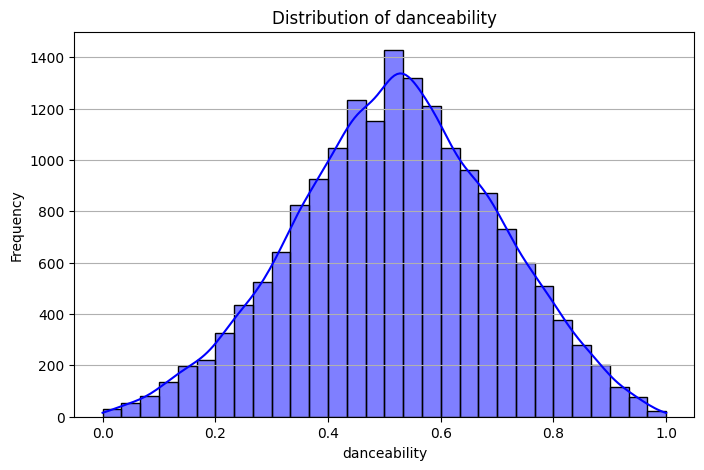

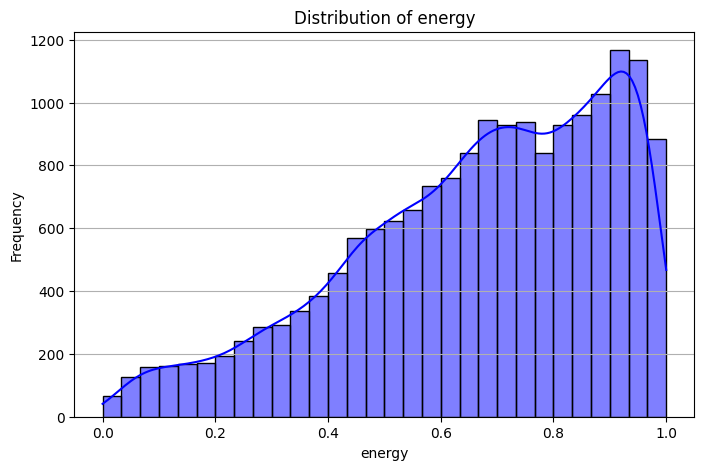

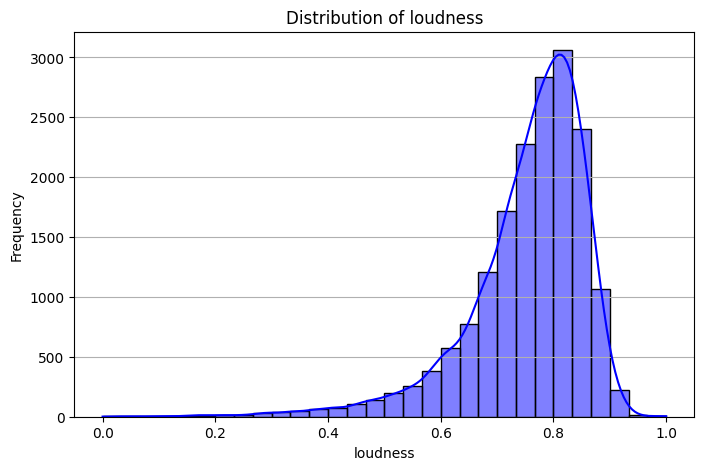

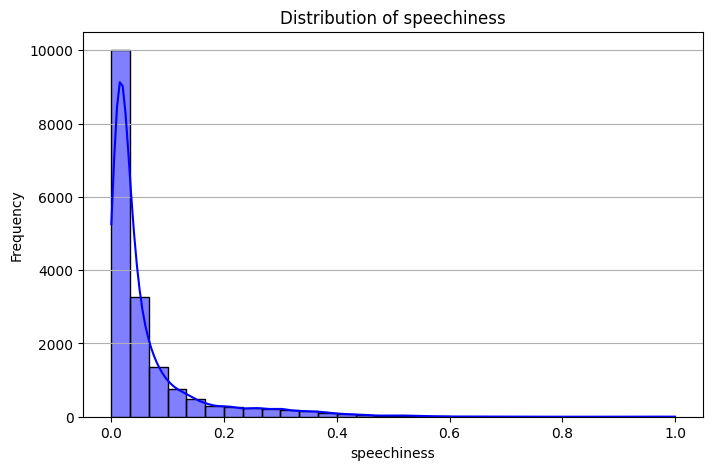

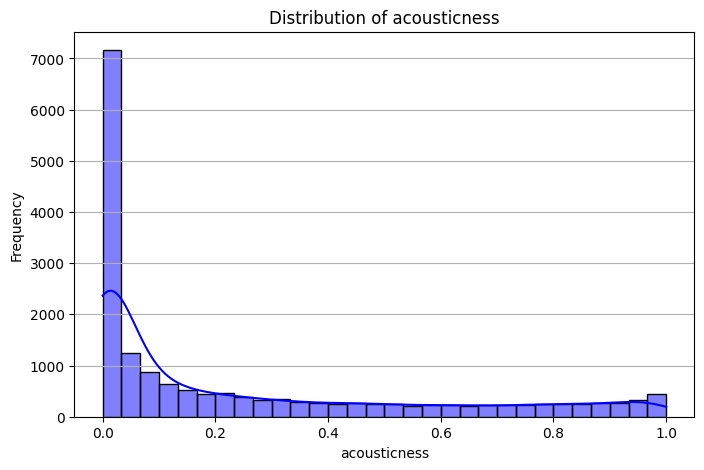

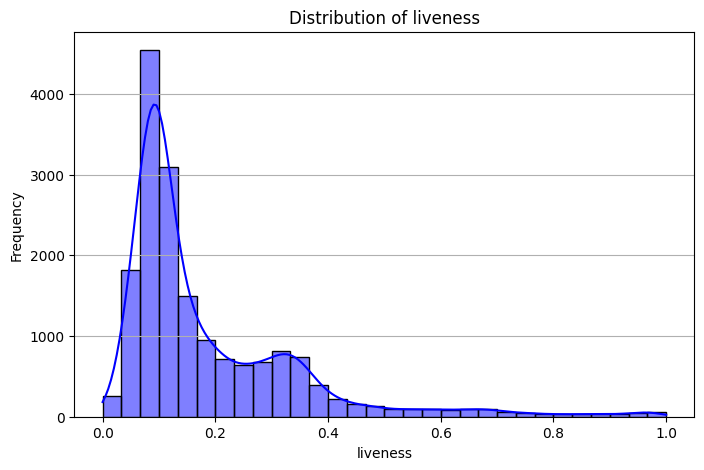

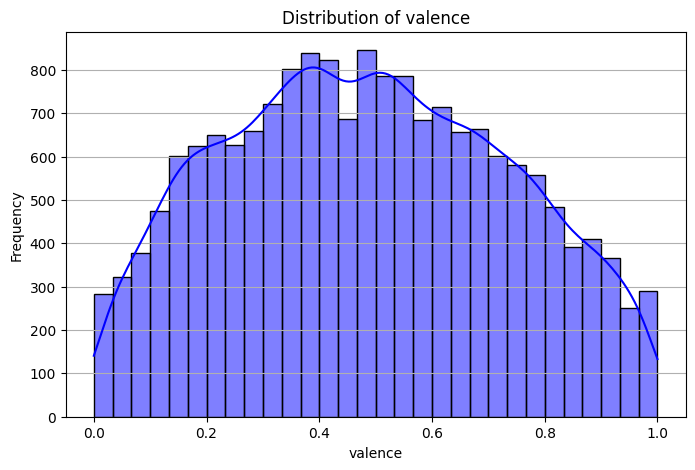

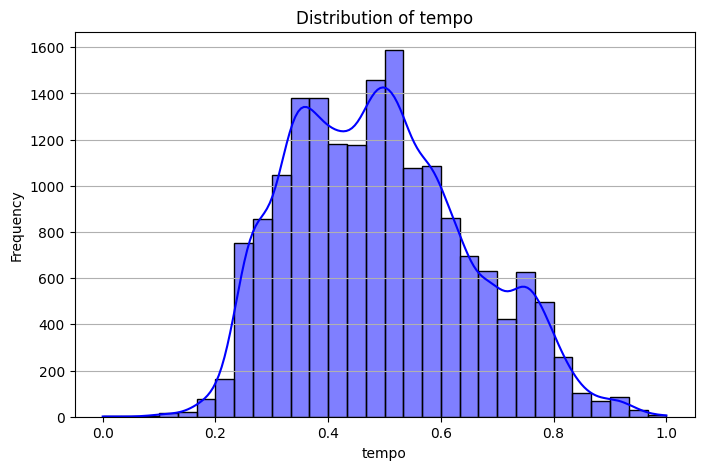

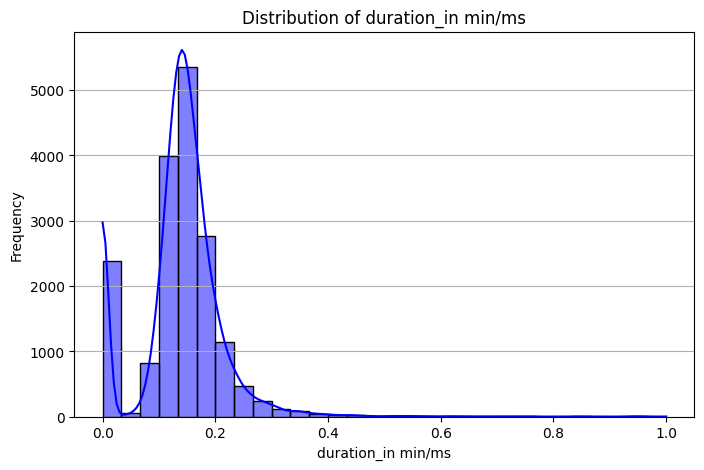

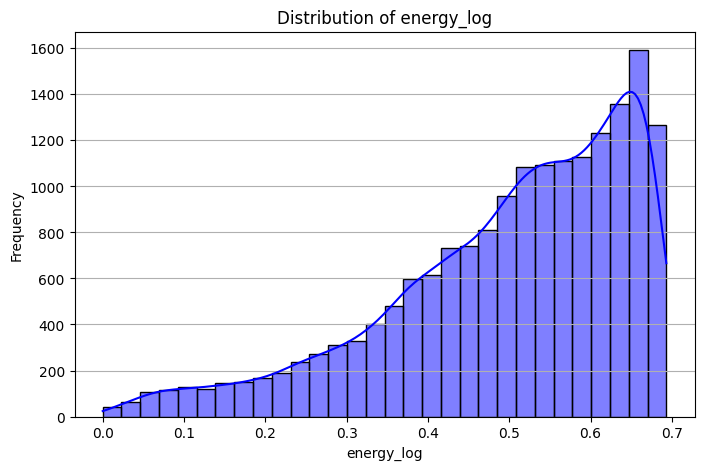

In [19]:
columns = new_df.columns
for column in columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(new_df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()


### Look at the data with relationships between the features and the Class variable

In [20]:
box_df = normalized_df.drop(['Artist Name', 'Track Name', 'mode','time_signature'], axis=1)

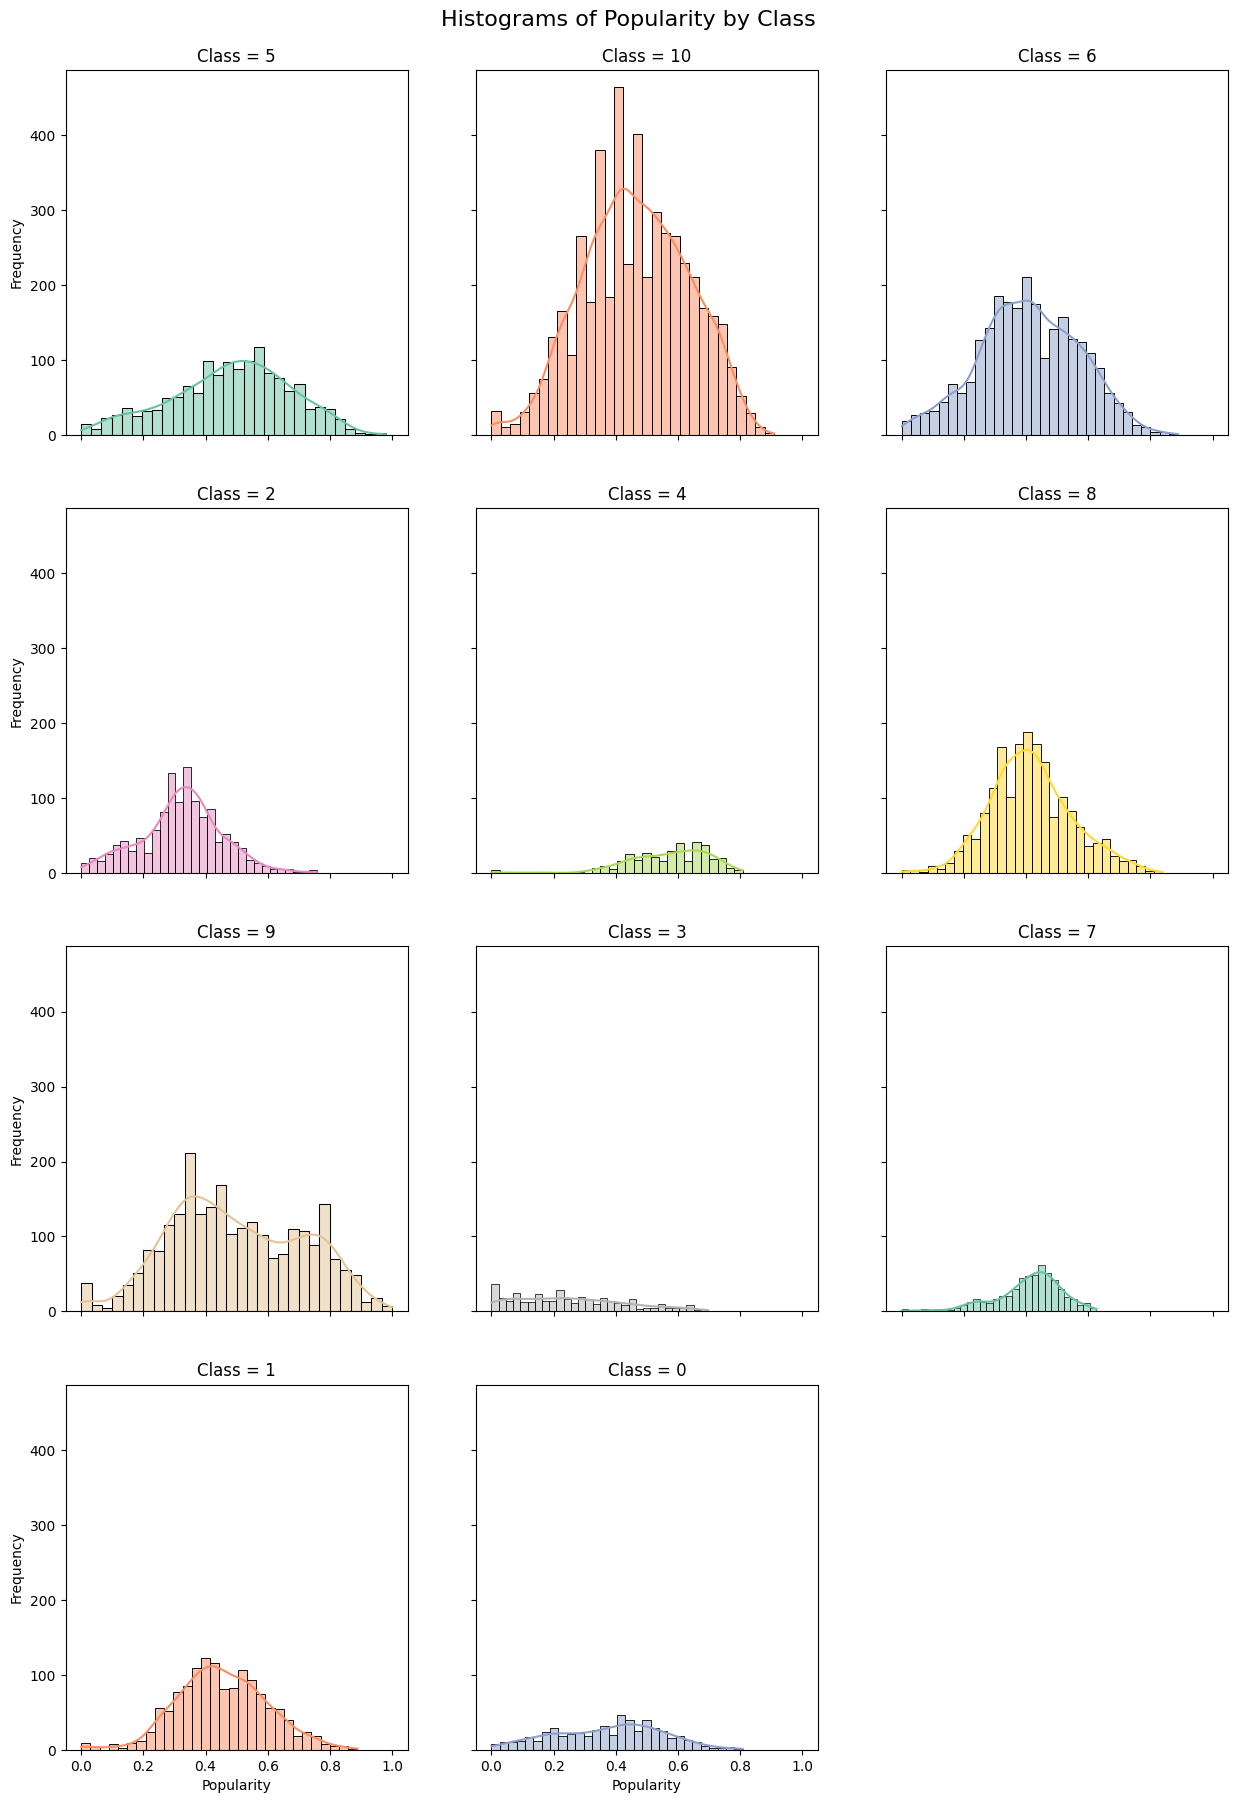

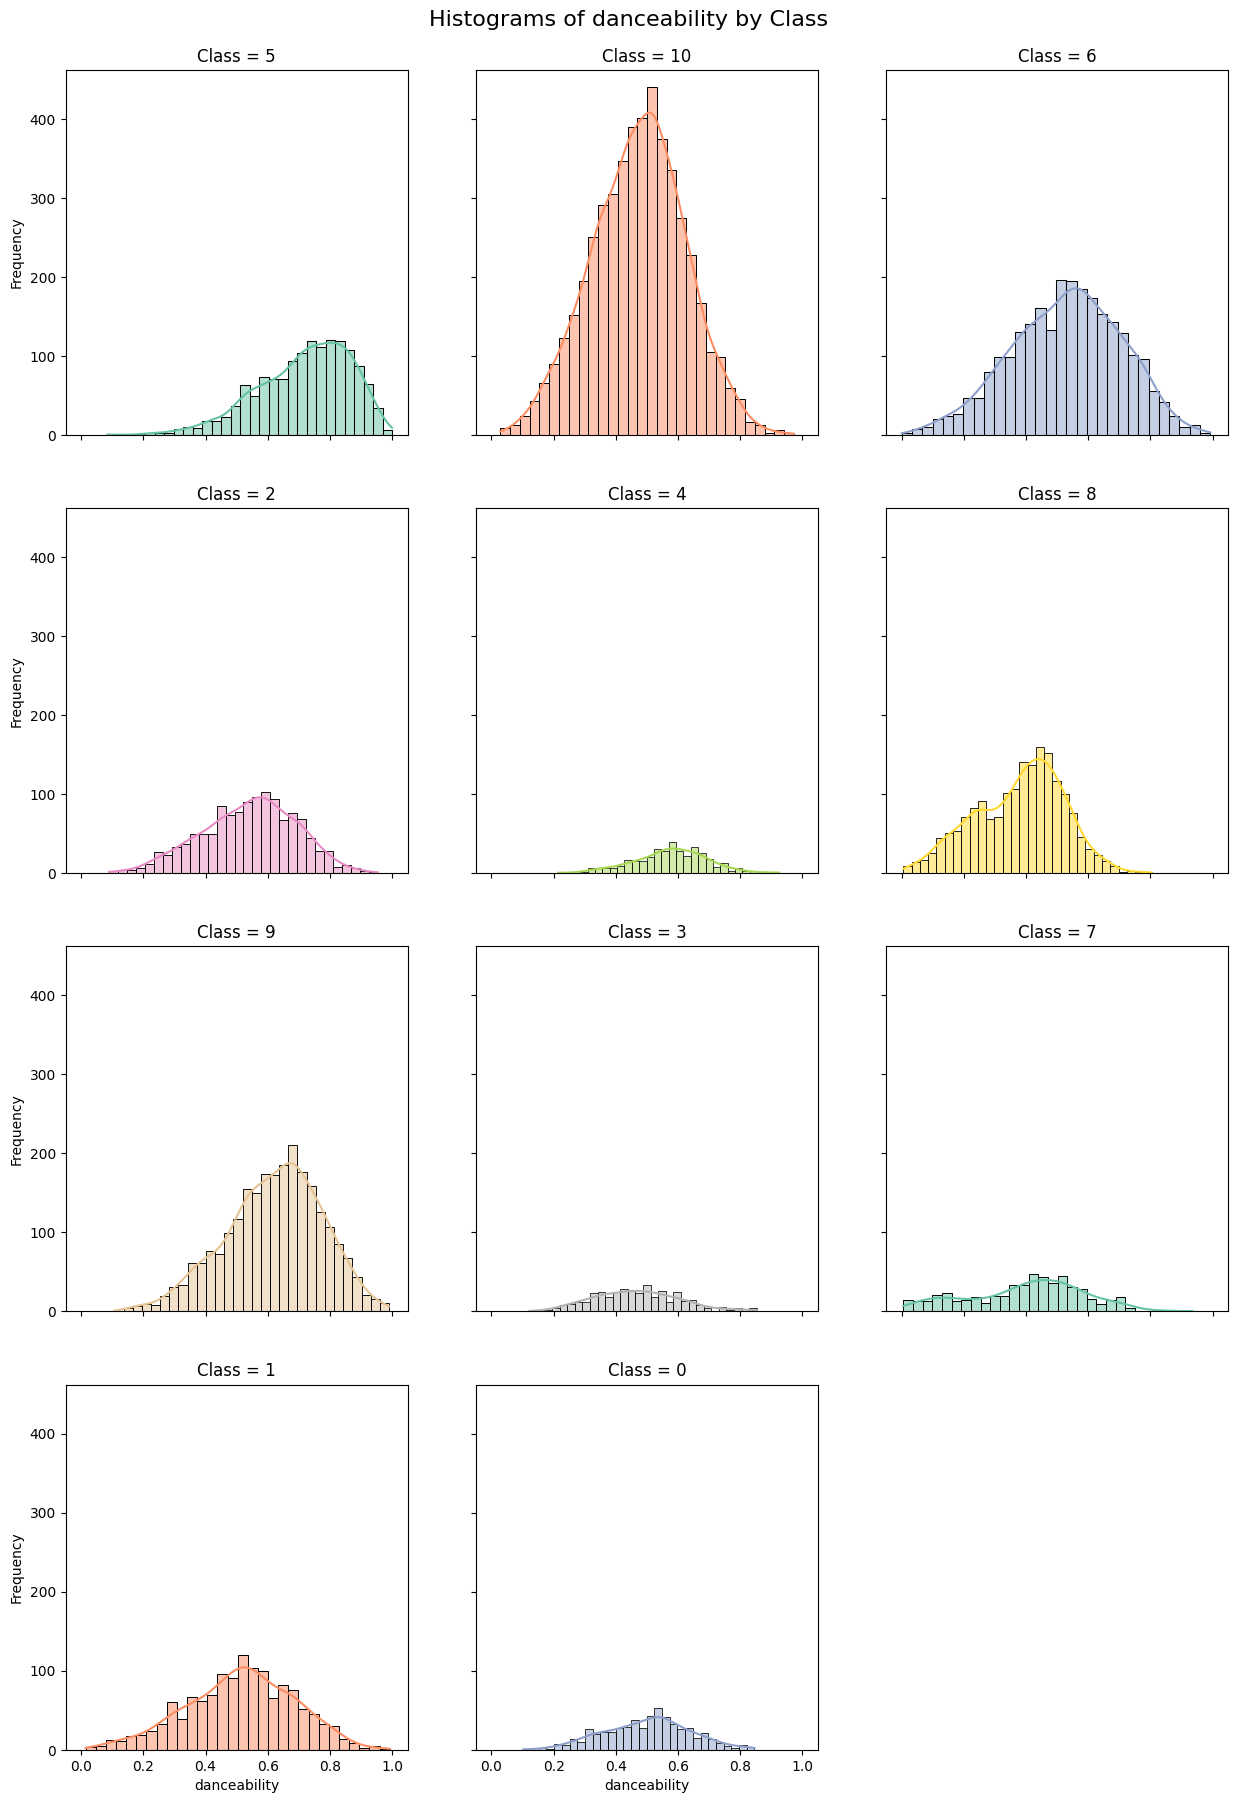

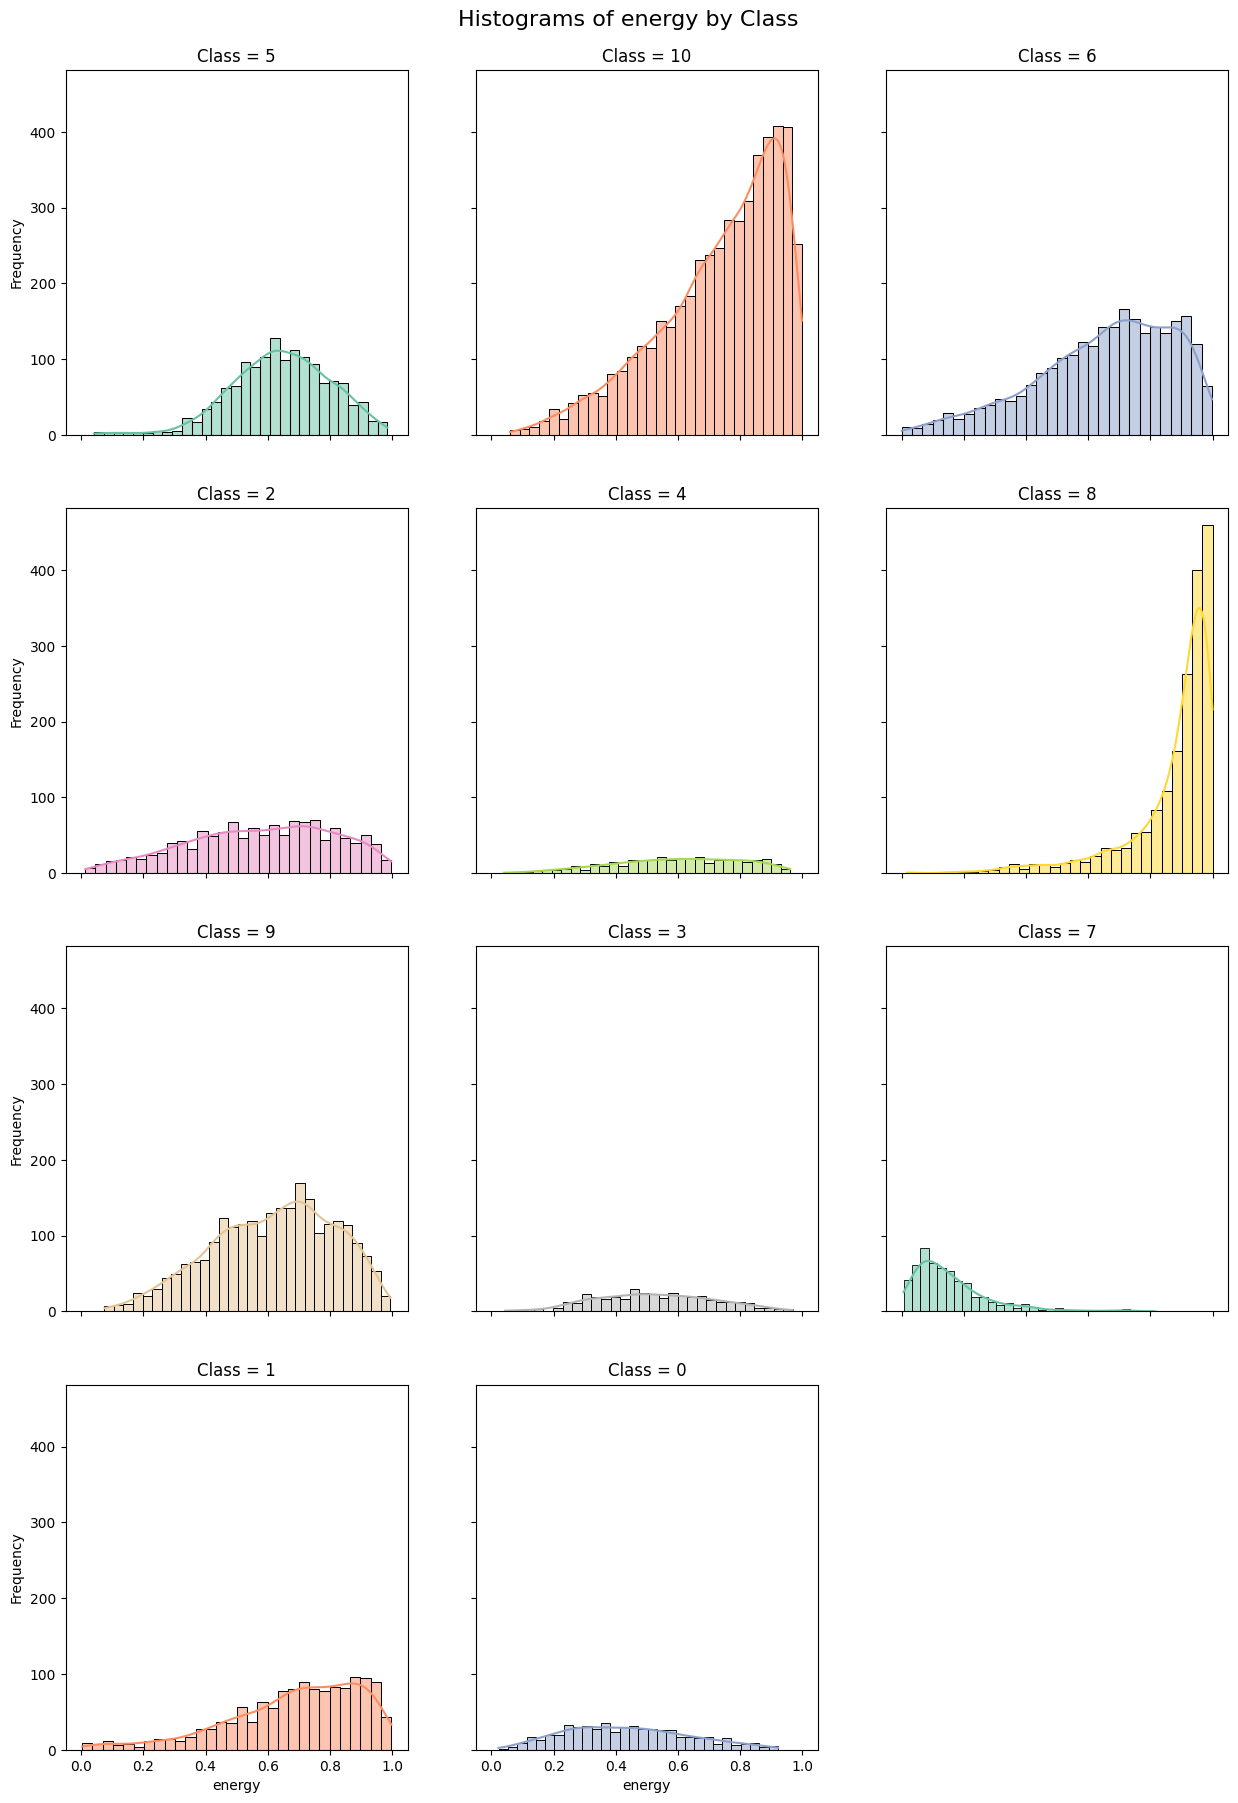

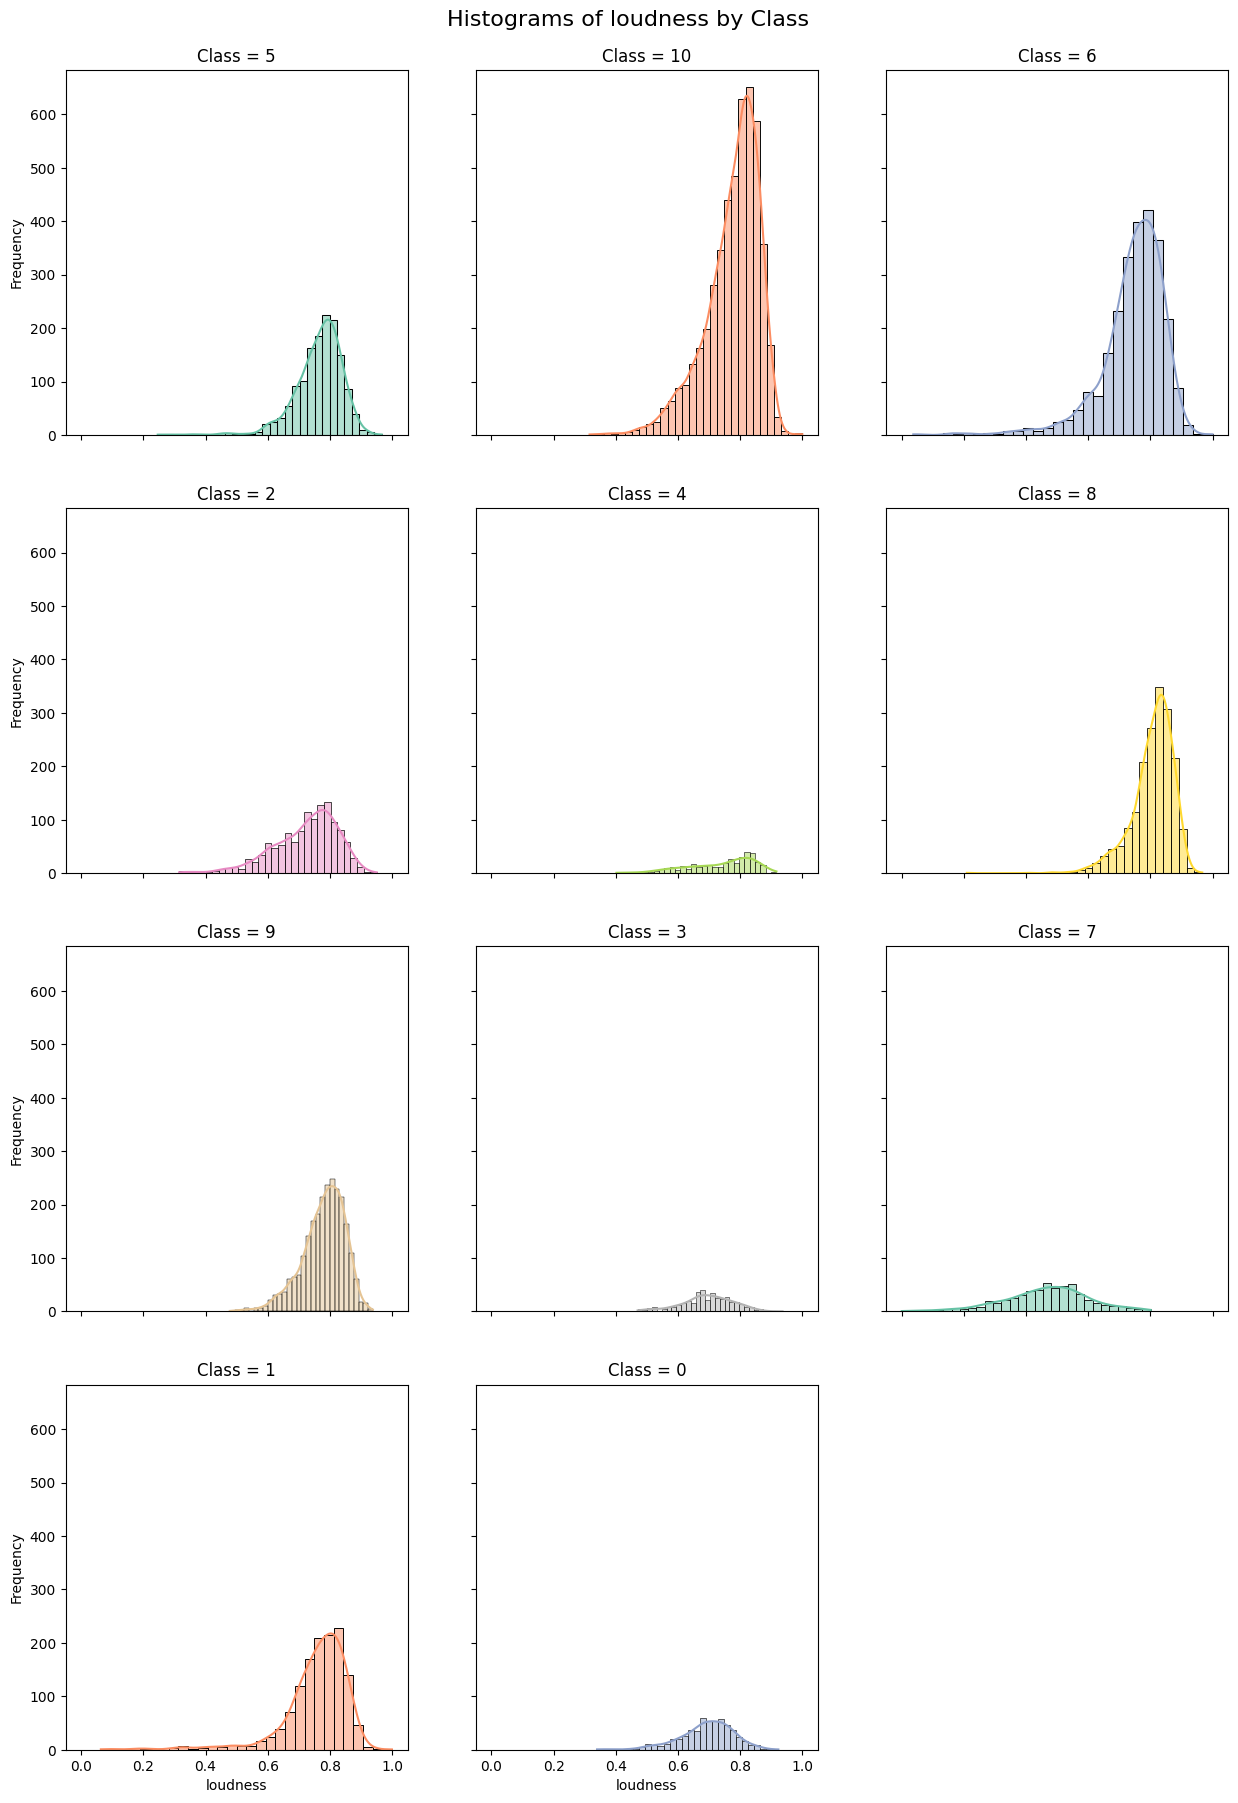

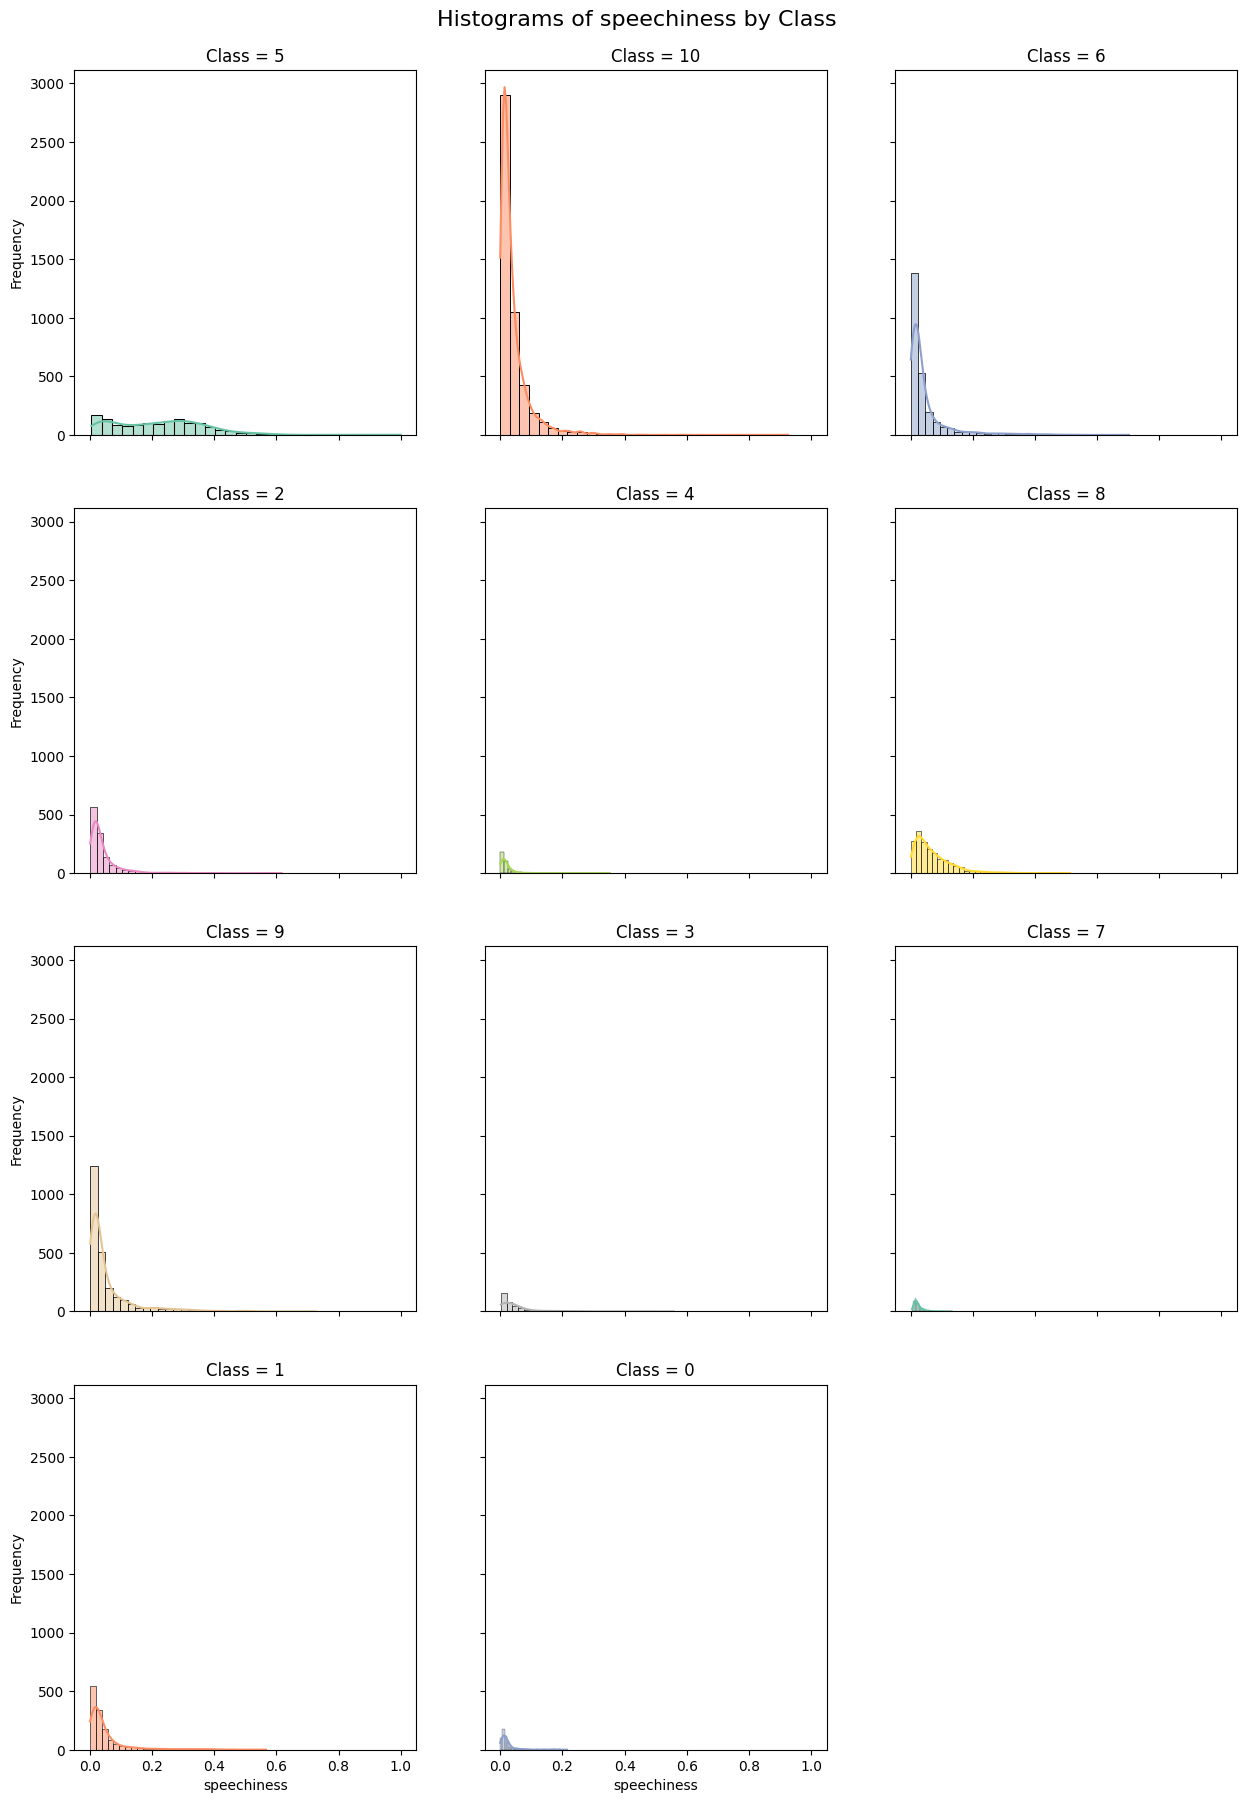

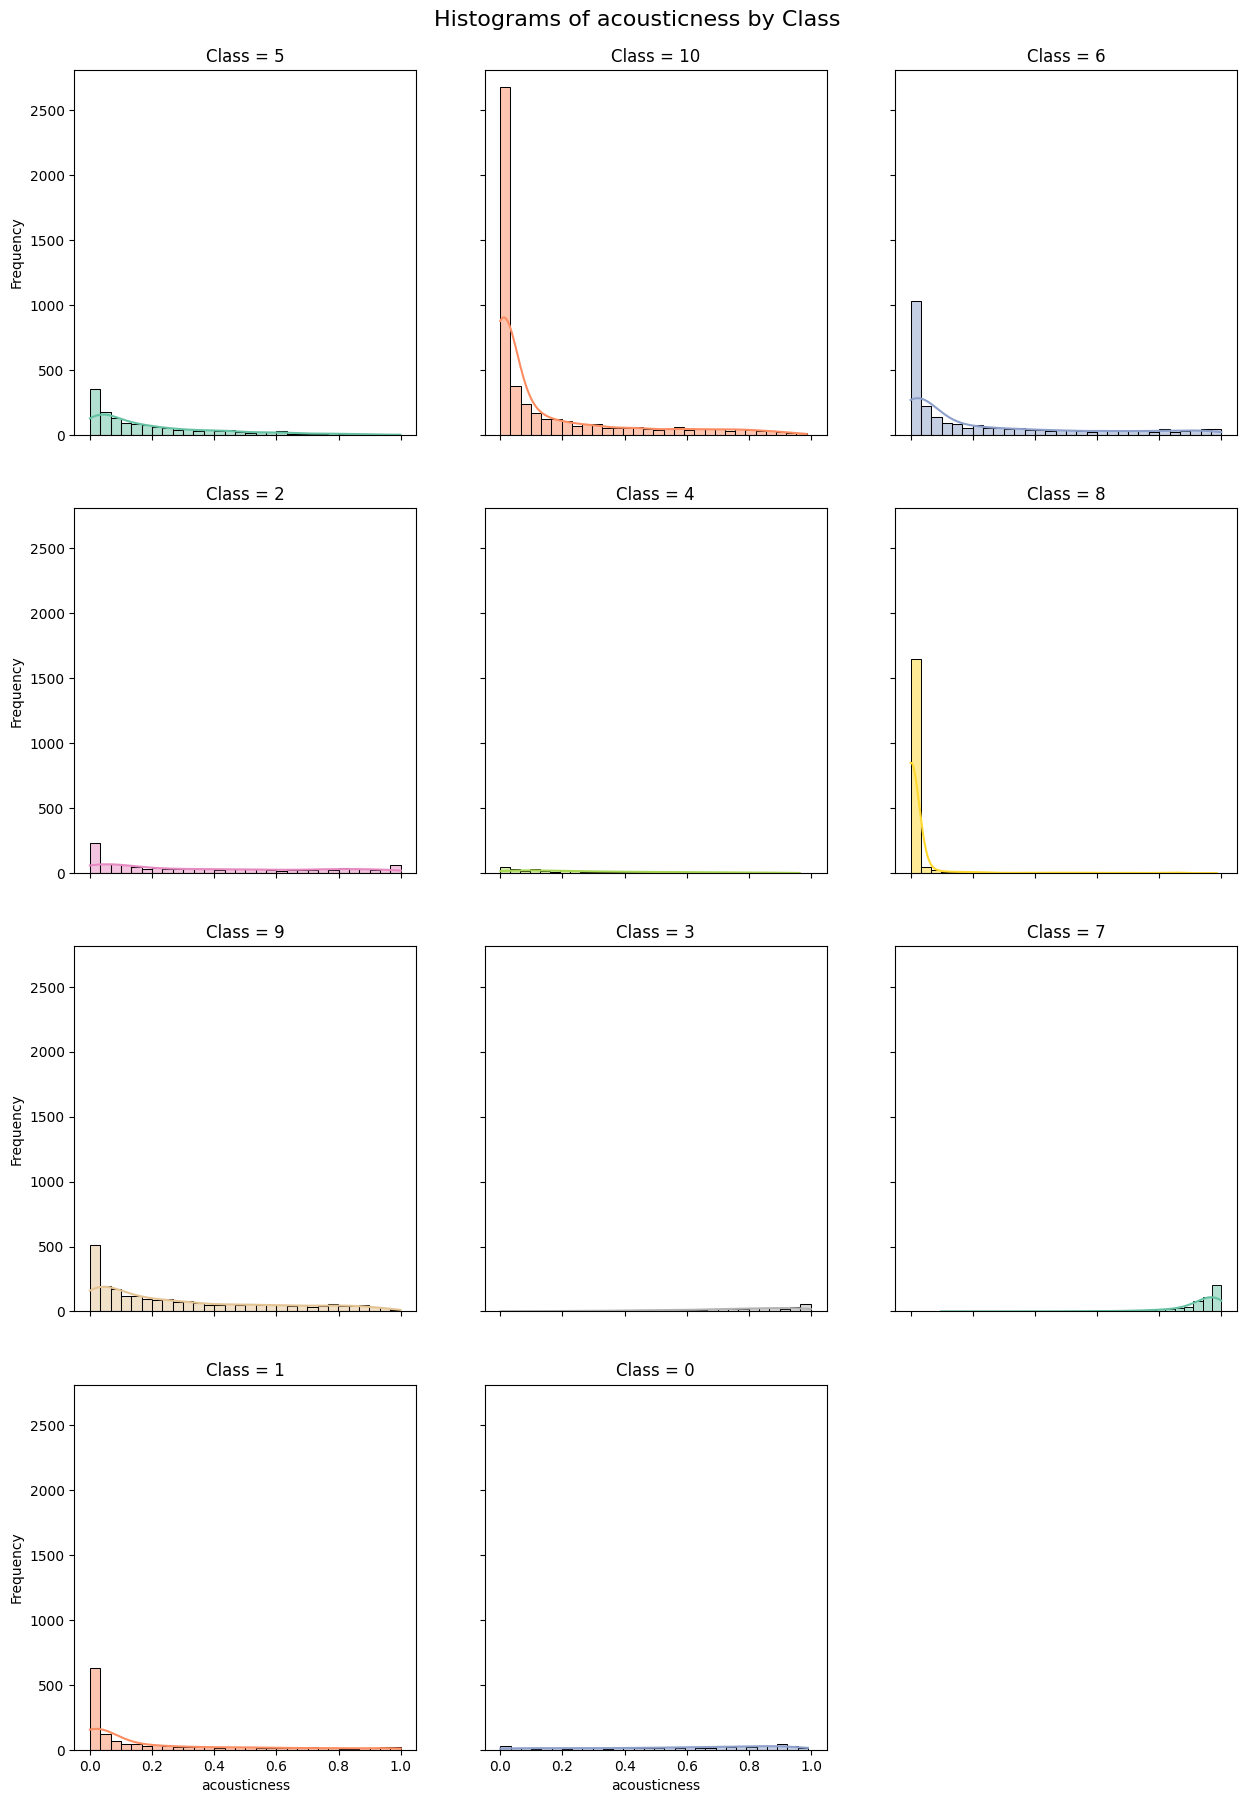

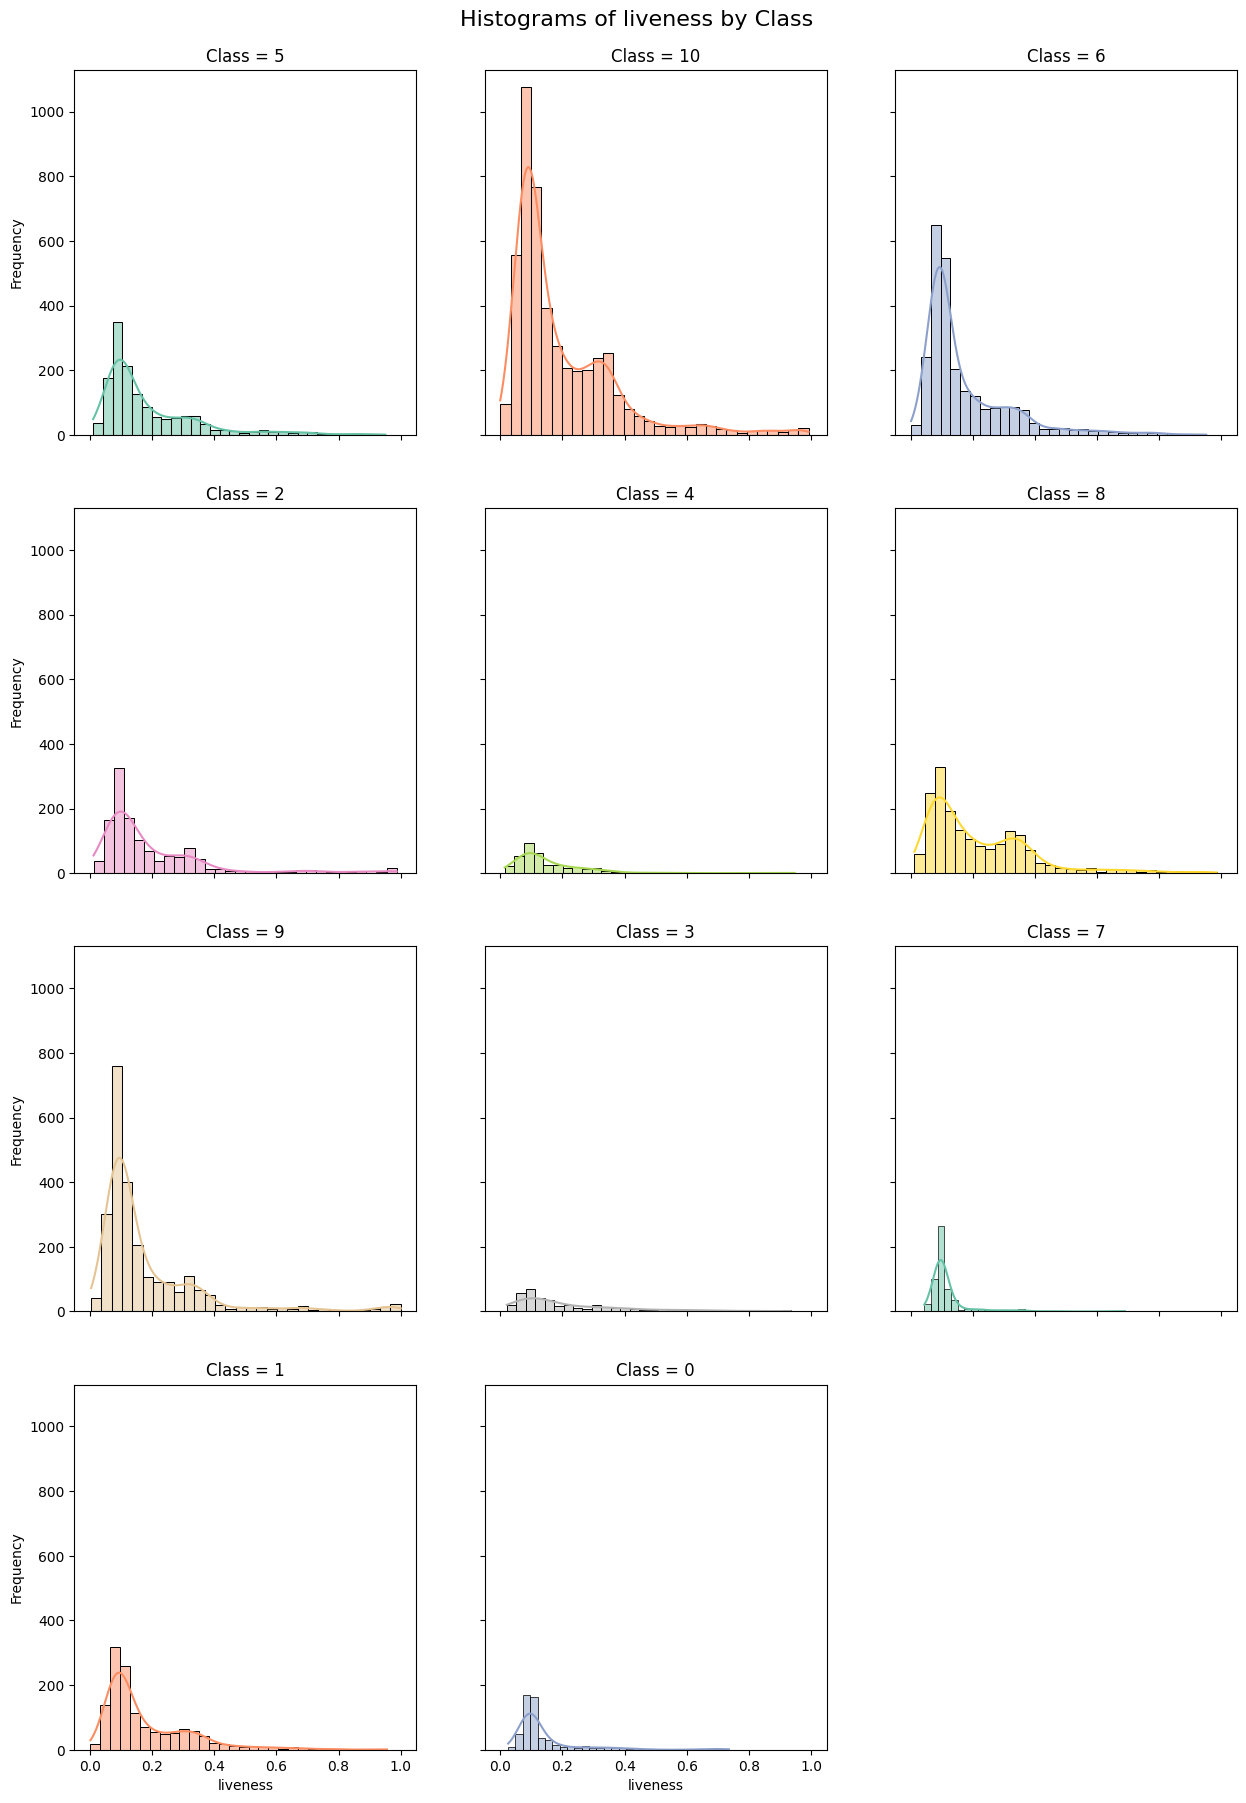

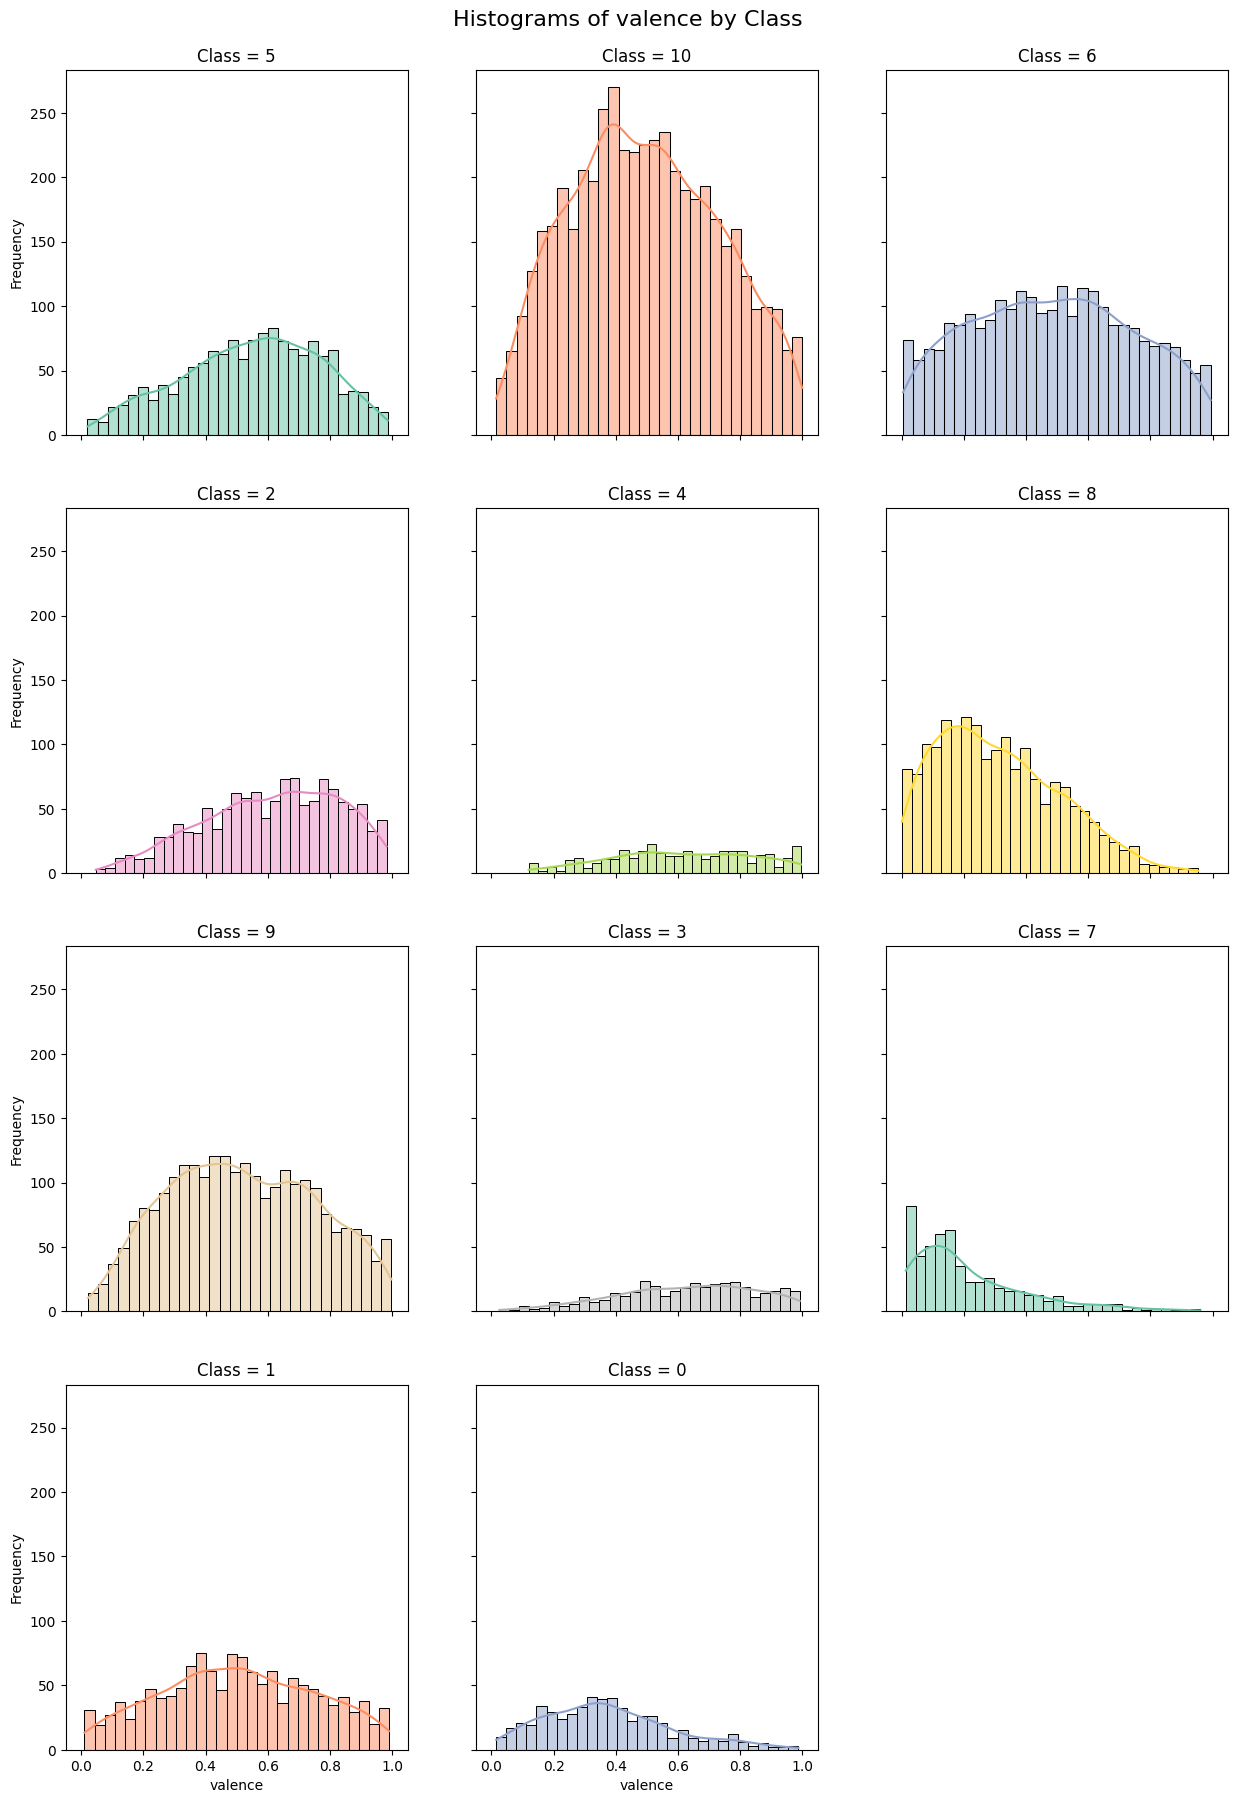

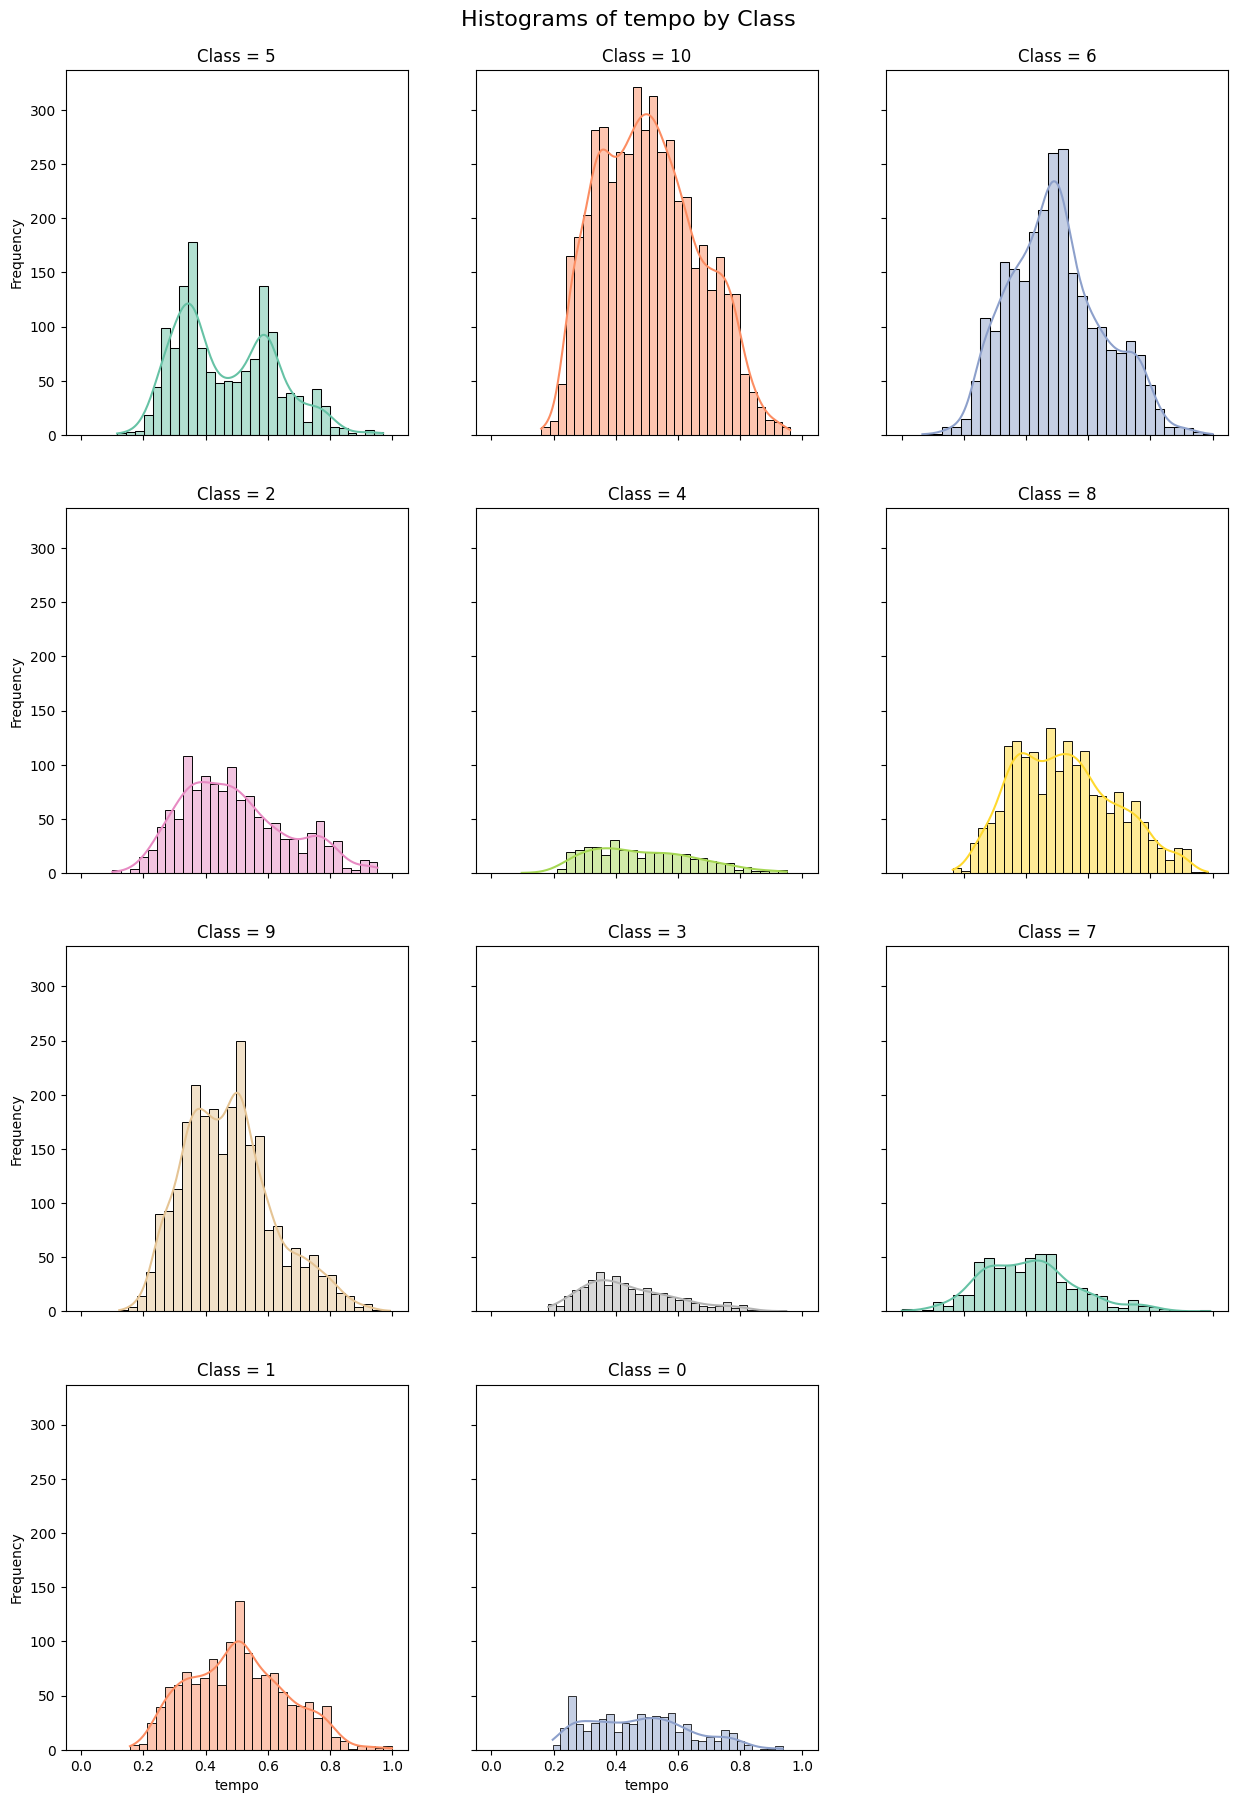

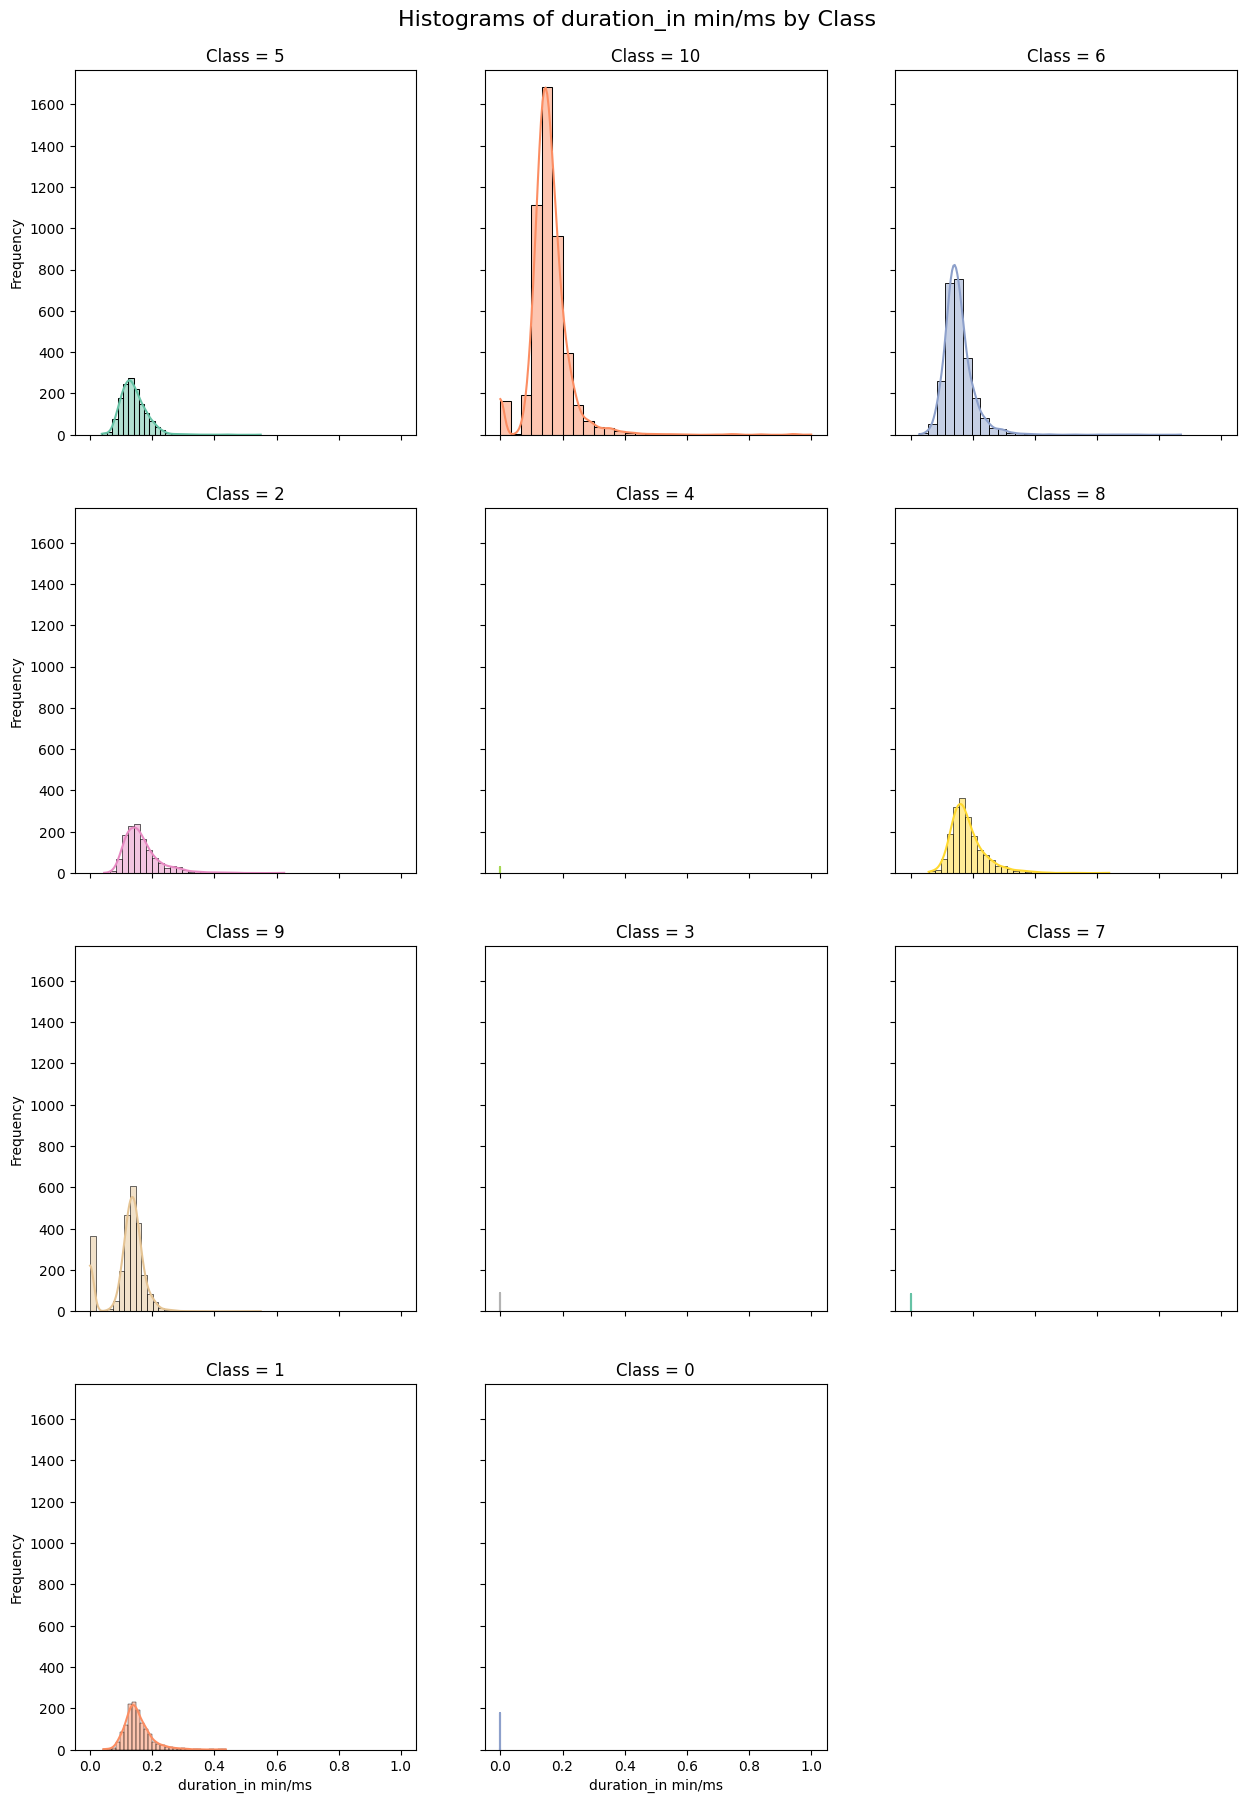

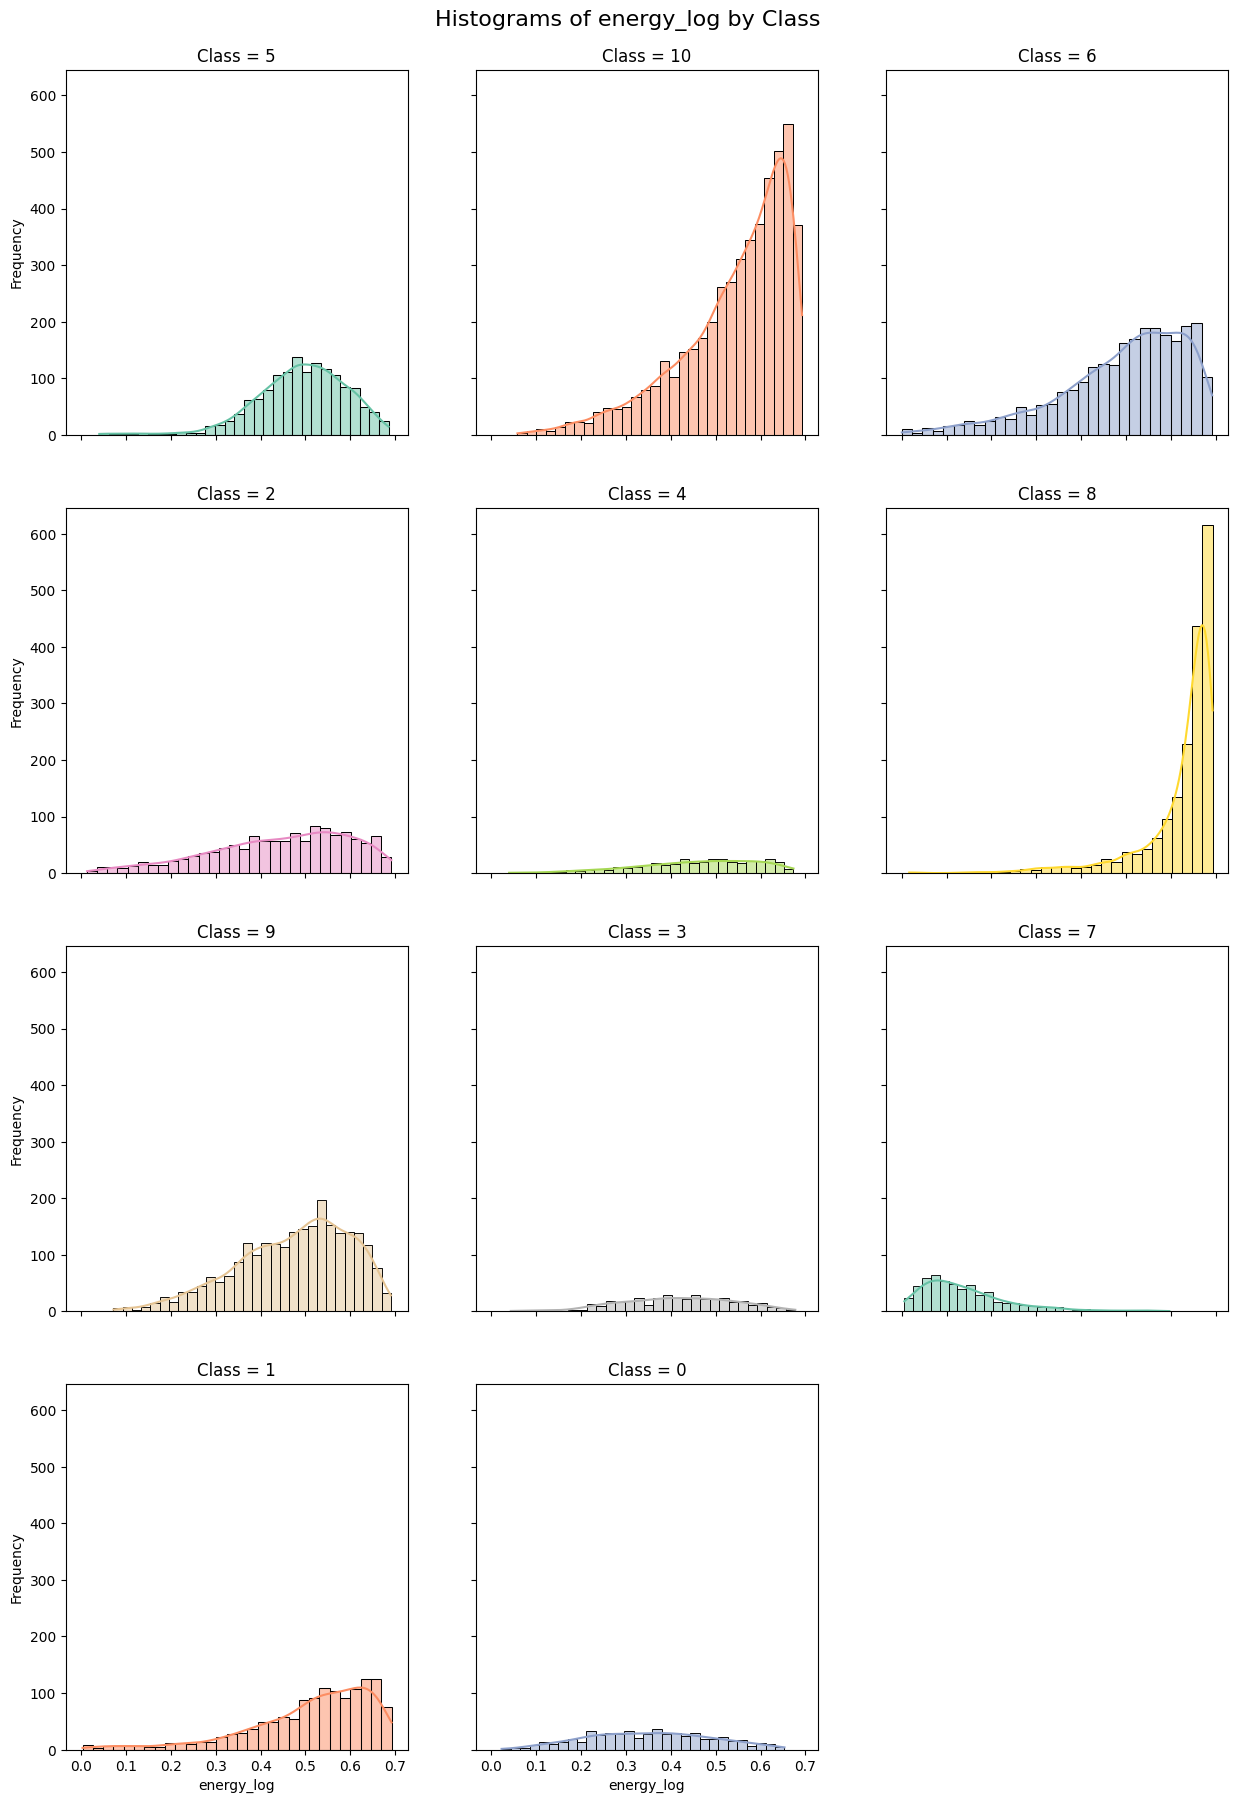

In [21]:
# Specify the target column for comparison
target_column = 'Class'

# Create histograms for all other columns grouped by the target column
for column in box_df.columns:
    if column != target_column:  # Skip the categorical column itself
        unique_classes = box_df[target_column].unique()
        num_classes = len(unique_classes)
        cols = 3  # Number of columns in the subplot grid
        rows = math.ceil(num_classes / cols)  # Calculate the required rows
        
        fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), sharex=True, sharey=True)
        axes = axes.flatten()  # Flatten for easier iteration if rows > 1

        # Create an infinite cycle of colors from the Set2 palette
        color_cycle = itertools.cycle(sns.color_palette("Set2"))
        
        for i, category in enumerate(unique_classes):
            sns.histplot(
                box_df[box_df[target_column] == category][column],
                kde=True,
                bins=30,
                color=next(color_cycle),  # Get the next color from the cycle
                ax=axes[i]
            )
            axes[i].set_title(f'{target_column} = {category}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
        
        # Remove unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.suptitle(f'Histograms of {column} by {target_column}', fontsize=16)
        plt.subplots_adjust(top=0.95)  # Adjust layout to fit title
        plt.show()


### Correlations per class

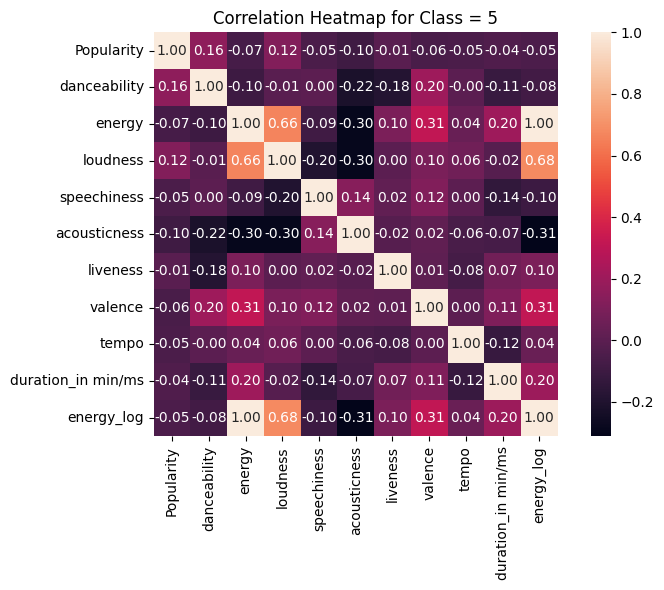

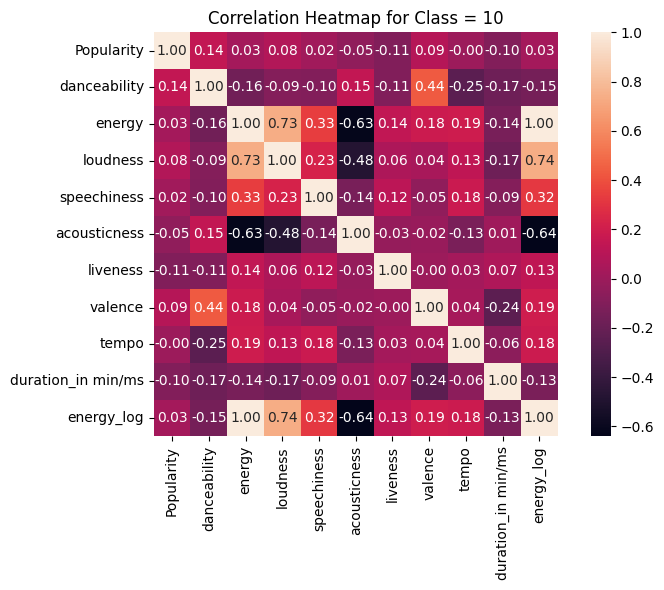

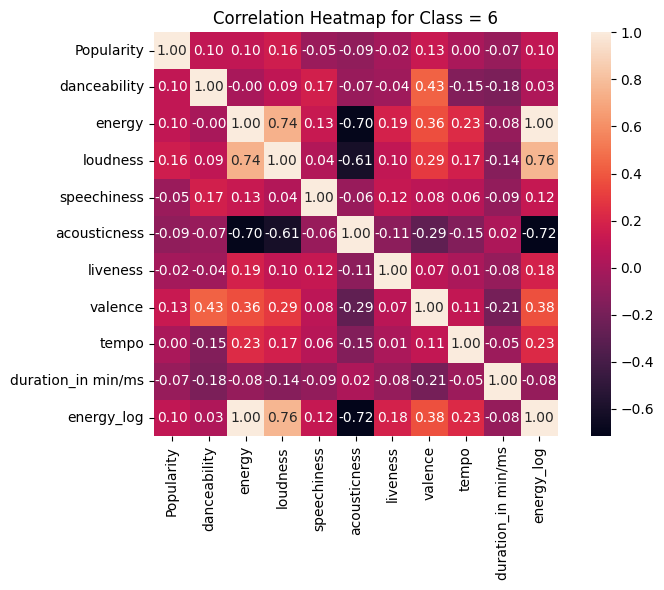

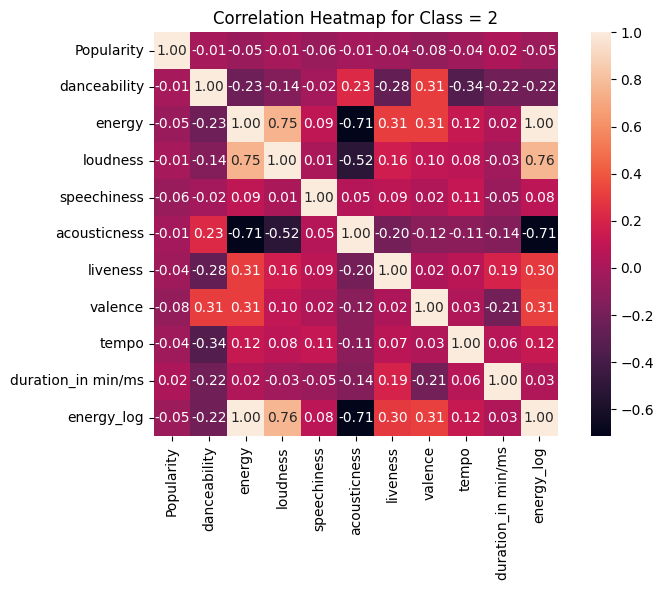

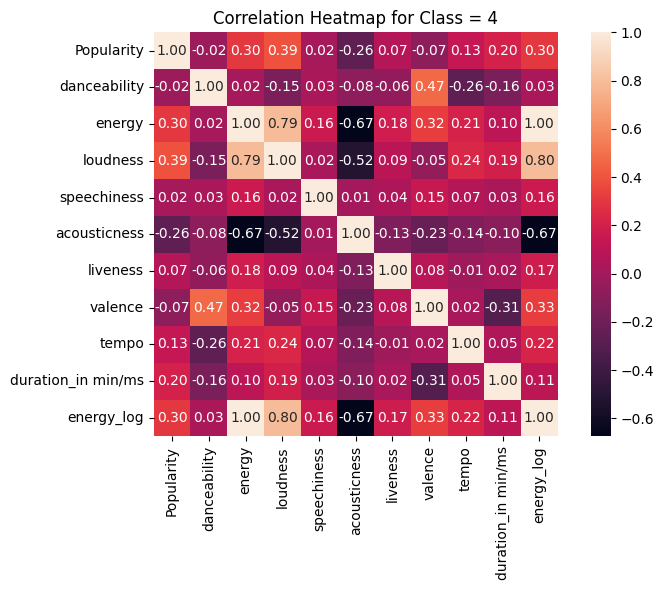

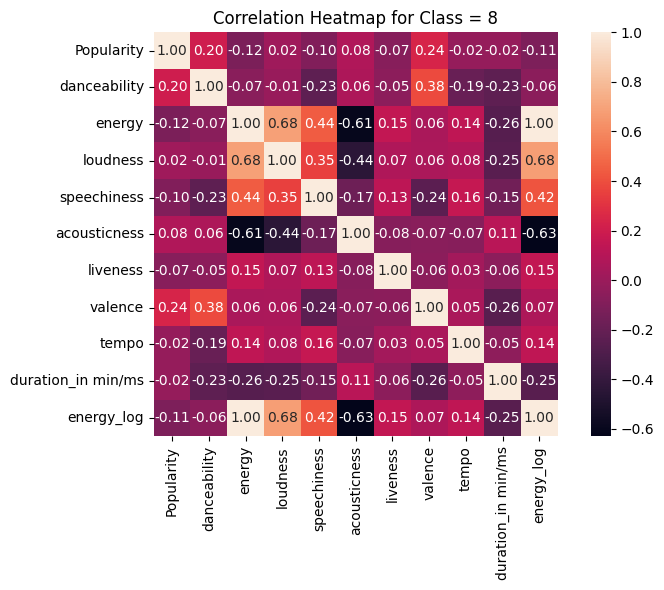

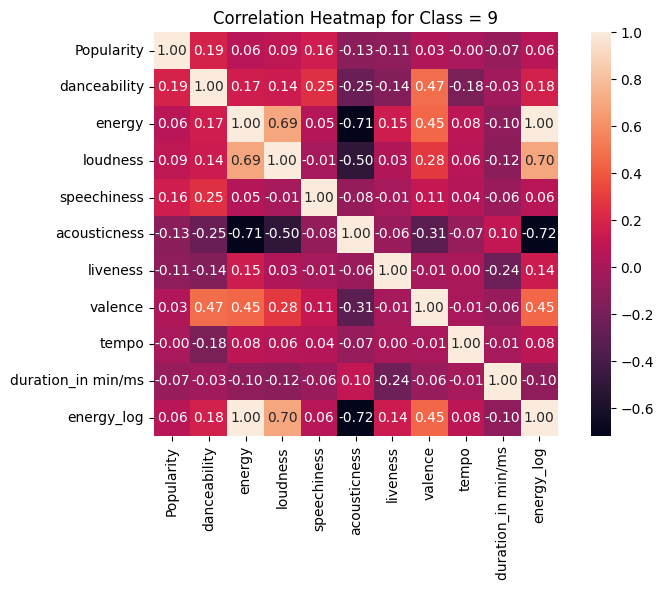

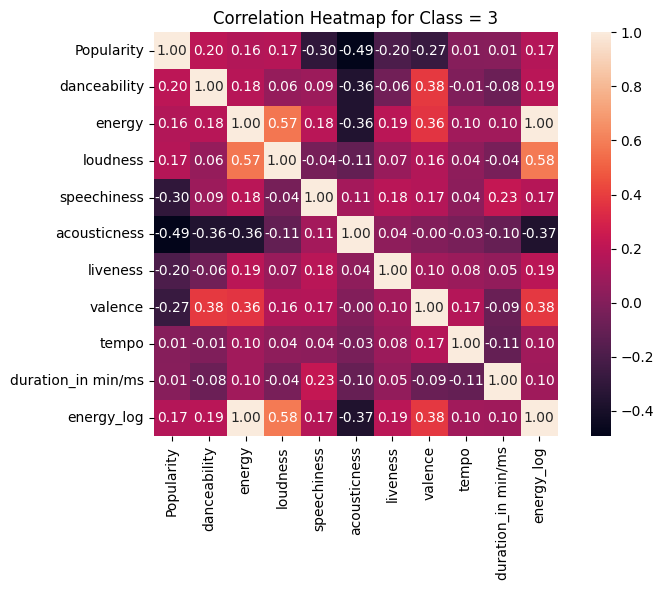

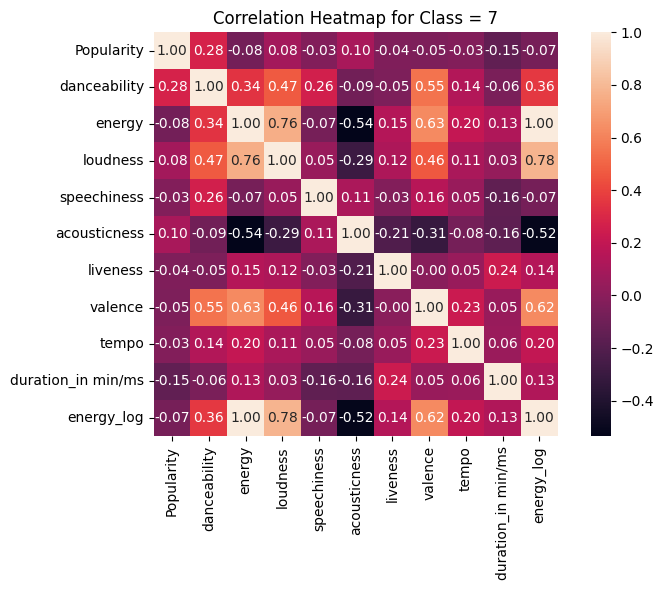

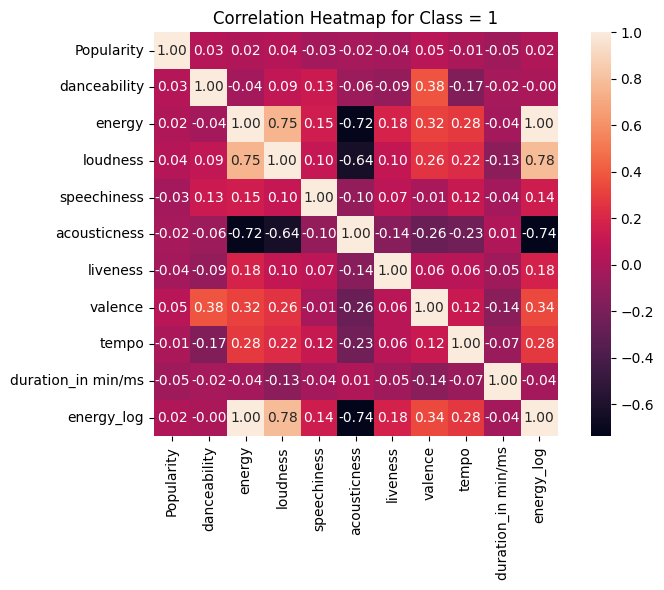

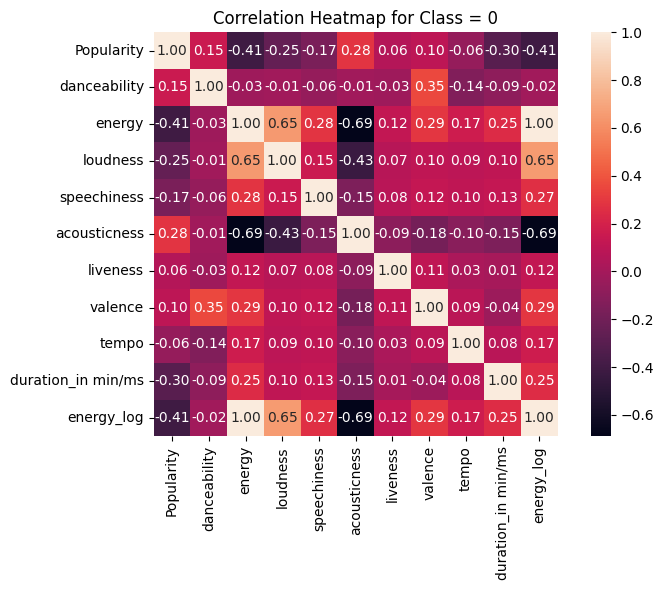

In [22]:
# Specify the target column for comparison
target_column = 'Class'

# List of columns to correlate (excluding the target column)
columns_to_correlate = [col for col in box_df.columns if col != target_column]

# Create an empty dictionary to store correlation matrices for each class
correlations_per_class = {}

# Loop over each unique class in the target column
for category in box_df[target_column].unique():
    # Filter the data for the current class
    class_data = box_df[box_df[target_column] == category]
    
    # Compute the correlation matrix for the current class
    correlation_matrix = class_data[columns_to_correlate].corr()
    
    # Store the correlation matrix in the dictionary
    correlations_per_class[category] = correlation_matrix

    # Plot heatmap for the current class
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        correlation_matrix,
        annot=True,  # Display correlation values on the heatmap
        fmt=".2f",  # Format numbers to 2 decimal places
        cbar=True,  # Include color bar
        square=True,  # Make the heatmap square
    )
    
    # Title and layout
    plt.title(f'Correlation Heatmap for {target_column} = {category}')
    plt.tight_layout()
    plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_4728\1163758654.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\user\AppData\Local\Temp\ipykernel_4728\1163758654.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\user\AppData\Local\Temp\ipykernel_4728\1163758654.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\user\AppData\Local\Temp\ipykernel_4728\1163758654.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

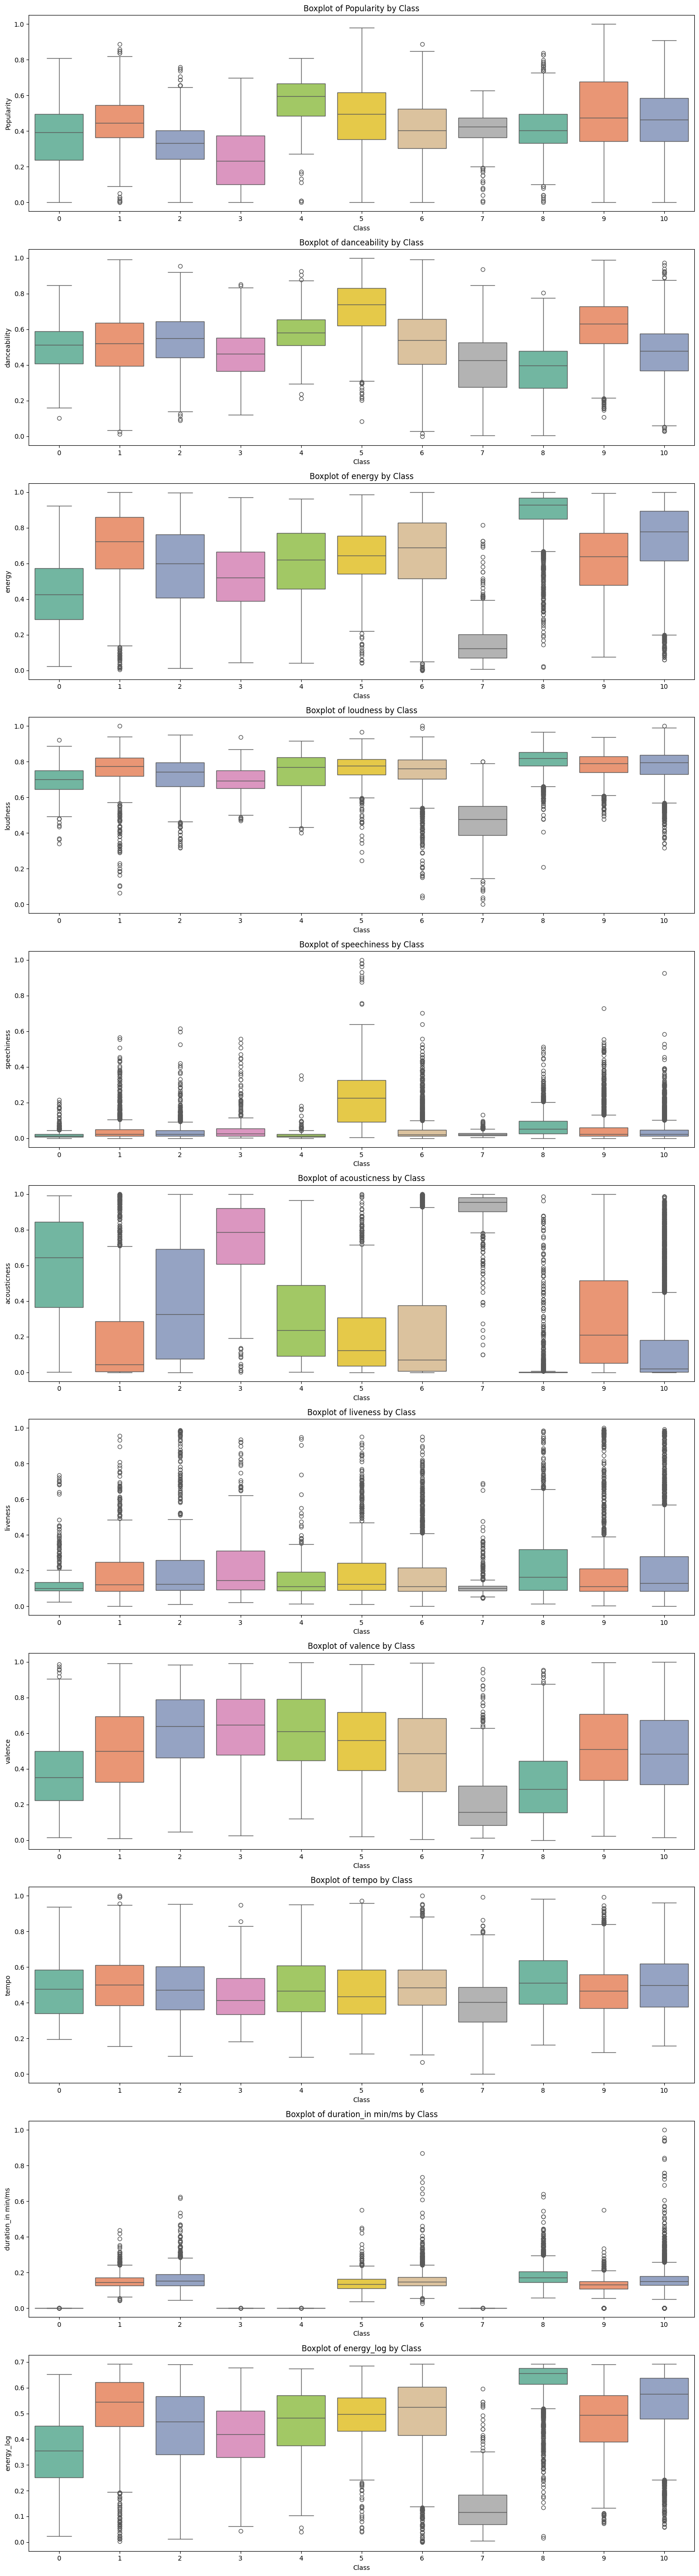

In [23]:
# Specify the target column for comparison
target_column = 'Class'

# List of columns to plot (excluding the target column)
columns_to_plot = [col for col in box_df.columns if col != target_column]

# Set up the plot size
plt.figure(figsize=(15, len(columns_to_plot) * 5))

# Loop over each column to create a boxplot
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(len(columns_to_plot), 1, i)  # Create subplots for each column
    sns.boxplot(
        x=target_column,  # x-axis is the target class
        y=column,         # y-axis is the numerical column to plot
        data=box_df,      # The dataframe
        palette="Set2"     # Color palette for the boxplots
    )
    plt.title(f'Boxplot of {column} by {target_column}')
    plt.xlabel(target_column)
    plt.ylabel(column)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


## Identifying and removing Outliers with z-score 

Import libraries for z-score

In [24]:
from scipy.stats import zscore

Compute z-scores and flag rows with the z-scores above threshold

In [25]:
z_scores = box_df.apply(zscore)
outliers = (z_scores.abs() > 2).any(axis=1)

Print the number of outliers

In [26]:
print(f"Number of outliers: {outliers.sum()}")

Number of outliers: 5631


Declare a new dataset without the outliers

In [27]:
box_df_clean = box_df[~outliers]

Plot again

C:\Users\user\AppData\Local\Temp\ipykernel_4728\238968483.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\user\AppData\Local\Temp\ipykernel_4728\238968483.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\user\AppData\Local\Temp\ipykernel_4728\238968483.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\user\AppData\Local\Temp\ipykernel_4728\238968483.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set 

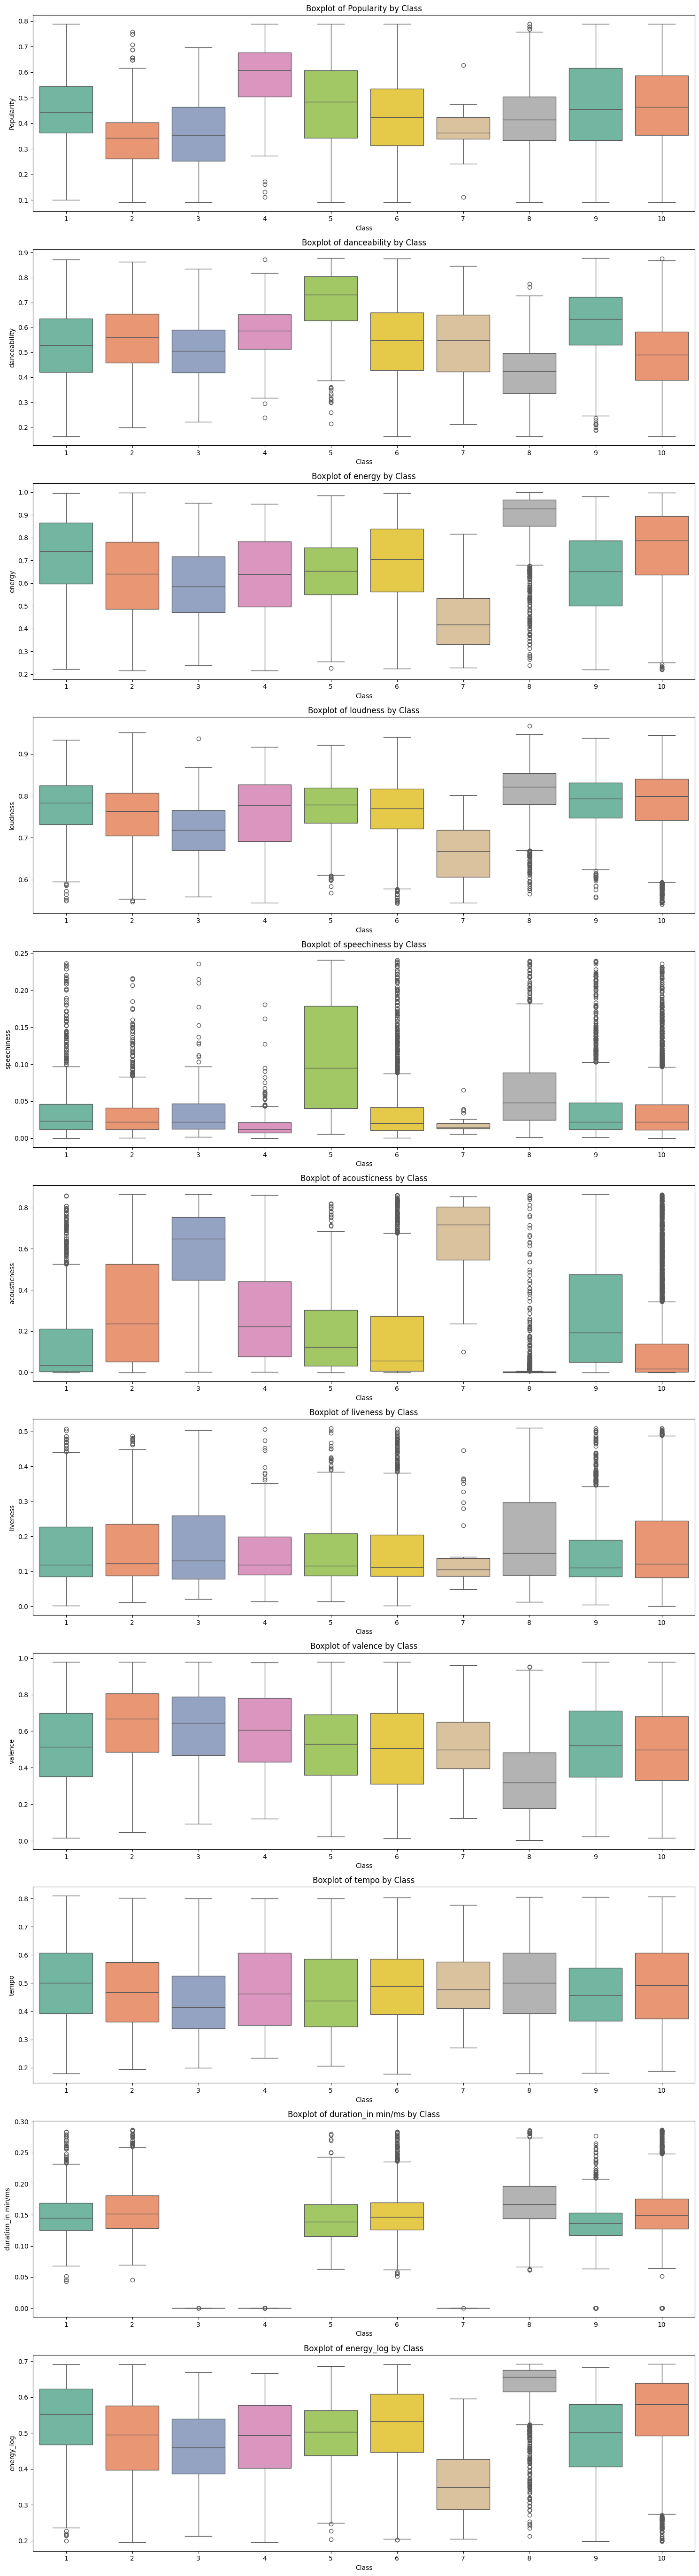

In [28]:
# Specify the target column for comparison
target_column = 'Class'

# List of columns to plot (excluding the target column)
columns_to_plot = [col for col in box_df_clean.columns if col != target_column]

# Set up the plot size
plt.figure(figsize=(15, len(columns_to_plot) * 5))

# Loop over each column to create a boxplot
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(len(columns_to_plot), 1, i)  # Create subplots for each column
    sns.boxplot(
        x=target_column,  # x-axis is the target class
        y=column,         # y-axis is the numerical column to plot
        data=box_df_clean,      # The dataframe
        palette="Set2"     # Color palette for the boxplots
    )
    plt.title(f'Boxplot of {column} by {target_column}')
    plt.xlabel(target_column)
    plt.ylabel(column)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


# Section 6. Initial model training

## K-Nearest Neighbors Model

TODO: *Insert reason why we use this model here*

Importing relevant libraries

In [75]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Creating the train and test datasets using train_test_split. We set test_size to 0.3 as it is a pretty standard test size. We stratify based on y to ensure that the data is split evently between the classes. Shuffle is to help randomize the data for possibly better fitting. Random state set for reproducability.

In [76]:
X_knn = box_df_clean.drop(columns=['Class', 'energy'])
y_knn = box_df_clean.values[:, -2]

Standardize features using MinMaxScaler

In [77]:
X_knn = MinMaxScaler().fit_transform(X_knn)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.3, stratify=y_knn, random_state=42)

In [79]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)

# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)
# X_train, y_train = rus.fit_resample(X_train, y_train)

# from imblearn.combine import SMOTETomek
# smt = SMOTETomek(random_state=42)
# X_train, y_train = smt.fit_resample(X_train, y_train)

print(X_train[0])

[0.39130435 0.82255639 0.58916281 0.15946548 0.40208575 0.64094426
 0.74801482 0.13416843 0.44580817 0.34289551]


See train and test split shape

In [80]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (8355, 10)
X_test shape:  (3582, 10)


Setup KNN Classifier and start fitting to the training data. For now, we will choose as arbitrary K value and distance metric that doesn't perform too badly

In [81]:
knn = KNeighborsClassifier(n_neighbors=20, metric="euclidean", weights="uniform")
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=20)

Test model on training data 

In [82]:
y_pred_train = knn.predict(X_train)
knn.score(X_train, y_train)

0.4891681627767804

We got a "decent" accuracy on training data, let's check testing accuracy

Now, we test on the test data

In [83]:
y_pred_test = knn.predict(X_test)
knn.score(X_test, y_test)

0.4276940256839754

We got a similar accuracy on testing data, this means no overfitting or underfitting is occuring. Unfortunately, the accuracies aren't high in general, meaning the model isn't too useful.

Confusion matrix of results

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

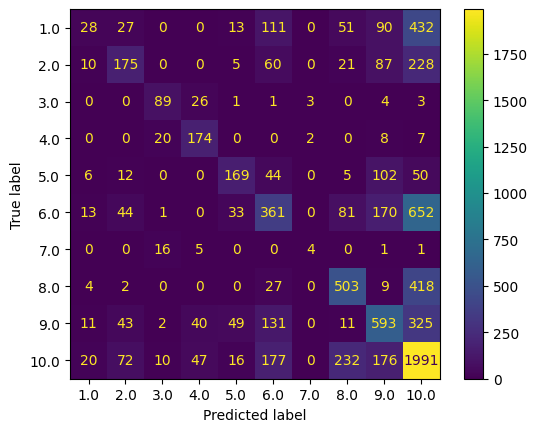

In [85]:
cm = confusion_matrix(y_train, y_pred_train, labels=knn.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
cmd.plot()

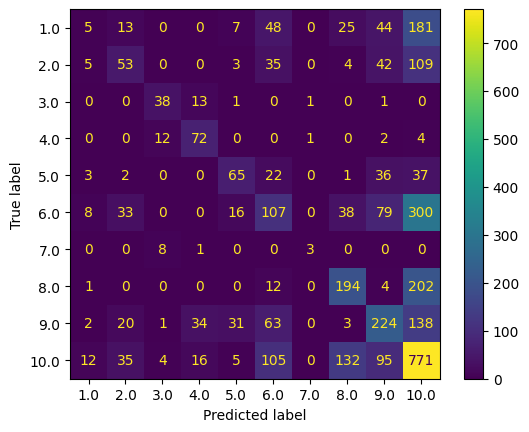

In [86]:
cm = confusion_matrix(y_test, y_pred_test, labels=knn.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
cmd.plot()

In [87]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         1.0       0.30      0.04      0.07       752
         2.0       0.47      0.30      0.36       586
         3.0       0.64      0.70      0.67       127
         4.0       0.60      0.82      0.69       211
         5.0       0.59      0.44      0.50       388
         6.0       0.40      0.27      0.32      1355
         7.0       0.44      0.15      0.22        27
         8.0       0.56      0.52      0.54       963
         9.0       0.48      0.49      0.49      1205
        10.0       0.48      0.73      0.58      2741

    accuracy                           0.49      8355
   macro avg       0.50      0.45      0.44      8355
weighted avg       0.47      0.49      0.46      8355



In [88]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         1.0       0.14      0.02      0.03       323
         2.0       0.34      0.21      0.26       251
         3.0       0.60      0.70      0.65        54
         4.0       0.53      0.79      0.63        91
         5.0       0.51      0.39      0.44       166
         6.0       0.27      0.18      0.22       581
         7.0       0.60      0.25      0.35        12
         8.0       0.49      0.47      0.48       413
         9.0       0.43      0.43      0.43       516
        10.0       0.44      0.66      0.53      1175

    accuracy                           0.43      3582
   macro avg       0.43      0.41      0.40      3582
weighted avg       0.39      0.43      0.39      3582



## Testing different hyperparameters

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

In [107]:
neighbor_values = [1, 5, 10, 20, 40, 50, 60, 70, 80, 100, 200, 500, 1000]

best_n = None
best_cv_score = 0
best_t_score = 0
t_scores = []
cv_scores = []

print("Tuning hyperparameters with cross-validation...")
for n_neighbors in neighbor_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean", weights="distance")
    
    cv_score = np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy"))
    t_score = np.mean(cross_val_score(knn, X_test, y_test, cv=5, scoring="accuracy"))

    cv_scores.append(cv_score)
    t_scores.append(t_score)
    
    if cv_score > best_cv_score:
        best_cv_score = cv_score
        best_n = n_neighbors

    if t_score > best_t_score:
        best_t_score = t_score

    print(f"n_neighbors={n_neighbors}, CV Accuracy={cv_score:.4f}, T Accuracy = {t_score:.4f}")

print(f"\nBest number of neighbors: {best_n} with CV Accuracy: {best_cv_score:.4f}")
final_knn = KNeighborsClassifier(n_neighbors=best_n, metric="euclidean", weights="distance")
final_knn.fit(X_train, y_train)

test_score = final_knn.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.4f}")

Tuning hyperparameters with cross-validation...
n_neighbors=1, CV Accuracy=0.3093, T Accuracy = 0.3183
n_neighbors=5, CV Accuracy=0.3562, T Accuracy = 0.3624
n_neighbors=10, CV Accuracy=0.3805, T Accuracy = 0.3886
n_neighbors=20, CV Accuracy=0.3969, T Accuracy = 0.3973
n_neighbors=40, CV Accuracy=0.4028, T Accuracy = 0.4126
n_neighbors=50, CV Accuracy=0.4047, T Accuracy = 0.4140
n_neighbors=60, CV Accuracy=0.4029, T Accuracy = 0.4121
n_neighbors=70, CV Accuracy=0.4028, T Accuracy = 0.4093
n_neighbors=80, CV Accuracy=0.4000, T Accuracy = 0.4051
n_neighbors=100, CV Accuracy=0.3977, T Accuracy = 0.4009
n_neighbors=200, CV Accuracy=0.3853, T Accuracy = 0.3802
n_neighbors=500, CV Accuracy=0.3485, T Accuracy = 0.3342
n_neighbors=1000, CV Accuracy=0.3271, T Accuracy = 0.3138

Best number of neighbors: 50 with CV Accuracy: 0.4047
Test Accuracy: 0.3956


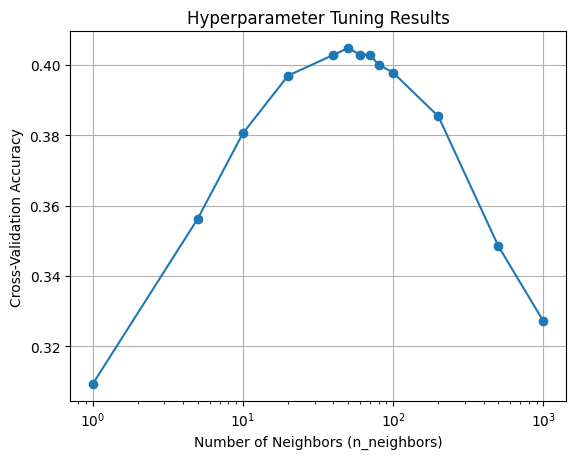

In [108]:
plt.plot(neighbor_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Hyperparameter Tuning Results")
plt.xscale("log")
plt.grid(True)
plt.show()

In [109]:
neighbor_values = [1, 5, 10, 20,40, 50, 60, 70, 80, 100, 200, 500, 1000]

best_n = None
best_cv_score = 0
best_t_score = 0
t_scores = []
cv_scores = []

print("Tuning hyperparameters with cross-validation...")
for n_neighbors in neighbor_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean", weights="uniform")
    
    cv_score = np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy"))
    t_score = np.mean(cross_val_score(knn, X_test, y_test, cv=5, scoring="accuracy"))

    cv_scores.append(cv_score)
    t_scores.append(t_score)
    
    if cv_score > best_cv_score:
        best_cv_score = cv_score
        best_n = n_neighbors

    if t_score > best_t_score:
        best_t_score = t_score

    print(f"n_neighbors={n_neighbors}, CV Accuracy={cv_score:.4f}, T Accuracy = {t_score:.4f}")

print(f"\nBest number of neighbors: {best_n} with CV Accuracy: {best_cv_score:.4f}")
final_knn = KNeighborsClassifier(n_neighbors=best_n, metric="euclidean", weights="uniform")
final_knn.fit(X_train, y_train)

test_score = final_knn.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.4f}")


Tuning hyperparameters with cross-validation...
n_neighbors=1, CV Accuracy=0.3093, T Accuracy = 0.3183
n_neighbors=5, CV Accuracy=0.3600, T Accuracy = 0.3627
n_neighbors=10, CV Accuracy=0.4050, T Accuracy = 0.4023
n_neighbors=20, CV Accuracy=0.4233, T Accuracy = 0.4123
n_neighbors=40, CV Accuracy=0.4353, T Accuracy = 0.4324
n_neighbors=50, CV Accuracy=0.4377, T Accuracy = 0.4274
n_neighbors=60, CV Accuracy=0.4373, T Accuracy = 0.4288
n_neighbors=70, CV Accuracy=0.4371, T Accuracy = 0.4243
n_neighbors=80, CV Accuracy=0.4339, T Accuracy = 0.4210
n_neighbors=100, CV Accuracy=0.4314, T Accuracy = 0.4162
n_neighbors=200, CV Accuracy=0.4165, T Accuracy = 0.3970
n_neighbors=500, CV Accuracy=0.3807, T Accuracy = 0.3490
n_neighbors=1000, CV Accuracy=0.3582, T Accuracy = 0.3317

Best number of neighbors: 50 with CV Accuracy: 0.4377
Test Accuracy: 0.4428


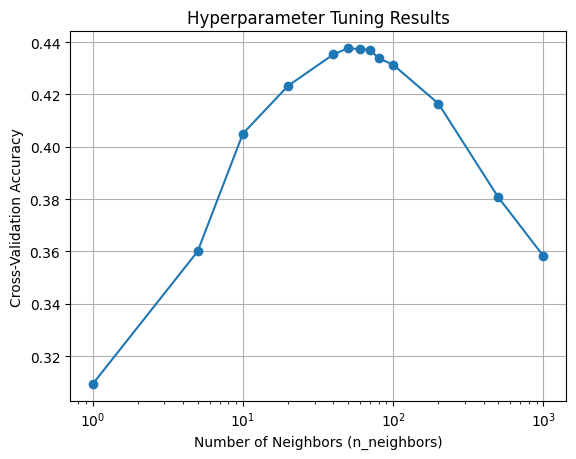

In [110]:
plt.plot(neighbor_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Hyperparameter Tuning Results")
plt.xscale("log")
plt.grid(True)
plt.show()